# Shoppers Exposed


_*This notebook was the support of a workshop held at Chronus Art Center (Shanghai), in September 2019 by Vytas Jankauskas & Claire Glanois.*

_*Written by Claire, still in progress of fine-tuning. Last Update: September 2019.*



____


### Workshop Description

The data we produce online is often distributed between various parties interested in knowing more about us.  New insights are generated as machine learning algorithms help speculate about our personalities, physical or psychological states, aspirations, among others. This information helps entities such as advertisers or corporations target individuals or groups with tailored products and services.

CAC Atelier ‘Shoppers Exposed’ will look into artificial intelligence as means to profile us based on individual consumer patterns. By exploring online purchase histories, identifying consumer types, we will discuss the human biases underlying algorithmic classification  We will play around and collectively re-appropriate customer taxonomies in an attempt to transgress normative labels. Based on the wordplay and semantics present in the product’s title, a new machine learning algorithm will be trained. The scope of the activity will therefore be to creatively grasp on how machine learning and predictive analytics work, rather than technocratically reverse-engineering their frameworks.

Drawing upon the semantic poetry of the product titles generated by our algorithm, we will try to imagine the next ‘perfect product’ in a world of overabundant commodities. What might our previously labeled  ‘sociopath gamer’, ‘impulsive entrepreneur’, or ‘confused artist’ buy next? We will use collage and rapid prototyping to embody new—even potentially absurd, useless or extravagant—hybrids of devices or services.

We will discuss how easy, hard, objective, biased, or ethically-challenging it may be to deploy algorithmic assessment on our digital profiles. We will reflect on the data we produce, the impact as well as the limits of statistical stereotypes attributed to our consumption. As part of the process we will learn practical skills in machine learning, data labelling, and creative prototyping. 
___

### Today's Roadmap

**Introduction**
   - Consumer Predictive Analysis
   - Why should we care?

**1. Data Prelude**
   - Load the data
   - Distill the data
   - Look at what you've got

**2. Semantic encoding**
   - From words to vectors
   - Semantic Distance
   - Taobao Semantic neighborhoods

**3. Alternative Classifier**
   - Label as you wish (to see the world)
   - Data Preliminaries
   - A Collective Classifier
   - A New Taxonomy


**4. Oracular recommenders**
   - Tell me my Next Commodity.
   - Tangible Recommender Enactement

**Appendix**
  - further readings/references
  - notes for future improvements


###How to Use this Google Colab?
To run this notebook by yourself, you should:
- Download this Jupyter notebook on your drive
- Download the GoogleNews-vectors-negative300.bin on your drive
- Download the taobao_xlsx on your drive
- Open the Jupyter notebook.
- Update the "pathRoot" in the Code initialisation part of the introduction, according to where you downloaded the files.
- You can go, run, and edit the cells!

# Introduction

### Consumer Predictive Analysis

A significant part of Machine Learning algorithms is currently used to model human beings, to be able to predict either their use of infrastructures, their energy consumption patterns, their political views, or which movie they are likely to buy, and their consumer behavior.

**Consumer Predictive Analysis** has reshaped the marketing industry recently, boosted by the explosion of **Big Data** and **smart bussinesses**, where operational decisions are increasingly made by machines to dynamically adapt to changing market conditions and customer preferences.
Thede databases of puchase intentions, means not only being able to target consumer with tailored advertisements, and adapt their recommendations algorithms, but also adapt their very products, services and productions lines.
It is said that ML helps retailers to know what their customers want before they want it, thanks to ML. 


The data used, in order to infer some future consumer behaviors about people usually extend way beyond our purchase history. It can involve: advanced demographic data including population, income, age, housing, health, education, business, race, spending habits, jobs, marital status, and most importantly our online browsing behaviors and web activity (web logs etc). Apart the data you left online, more or less deliberately, or that you consent to trade for services, there is the data inferred about your which delineate a speculative personal profile of your character: motivation, psychological perceptions, personality, emotions, beliefs, attitude, cultural group, political views, etc.

**Dynamic Pricing, Targeted advertisement, Neuromarketing, Captology, Nudge theory, Psychometrics, sentiment analysis, emotion recognition**, are all fields, powered by AI, which feed contemporary marketing practices.


### Why should we care ?
The vast majority of our daily transactions and interactions prescribed, mediated and governed by algorithms, and AI is now automating processes in areas we wouldn’t think they would (health, justice, education, decision-making, etc.).
AI grew as an ideology, instead of merely staying a tool.

Even though often branded as rational, AI is not objective. It is permeated by human choices, biases, and priors.
And AI is not an abstraction. It has an impact on our behaviors, our choices, our ethical conceptions, our political views, and restructure the way we work, learn or relate, as individuals and societies. A common issue with these types of predictive algorithms, comes from fact that predicting human behavior is not like predicting far distant stars trajectories (which wont change their path): at the contrary, it channels us into specific behaviors.

**It is crucial to look behind these smooth interfaces, how these algorithms operate, and how do they both reflect and affect the social, historical and political landscapes.**


### **Code Initialisation**
   

   The first step usually is to import all the modules (ready-made code) which will be useful for our workshop. 
   Let's also update some basic information about today's workshop and the number of participants.
   
   •••••••*Run the code below.*•••••••

In [2]:

###########INITIALISATION

##PATH Root: Update where the files you downloaded are.
#By default, should be the following:
#pathRoot='/content/drive/My Drive/' #uncomment this
pathRoot='/content/drive/My Drive/Colab Notebooks/ShopperExposed/'#comment this

#UPDATE these parameters according to the workshop
nPerson = 7 #number participants
nItem = 10 #number of TaoBao item per participant
nTotal = 9000 #total number items in dataset (+/-). Will update it automatically.
nKeywords=0 #Later would be the number of Keywords

##########IMPORT
#This is to import all the modules which will be useful.
#Also, RunTime type has to be set as GPU
#If not able to simply import something: try a "!pip install"...

#Basics
import pandas as pd
import numpy as np
import io
import umap
import seaborn as sns
import datetime, nltk, warnings
import itertools
from pathlib import Path
from IPython.display import Image, display, HTML
import IPython #For image display
#SciKIT library
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics.pairwise import cosine_similarity

#nltk library
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize 
#To upload/download files here from Drive can use:
from google.colab import drive
drive.mount('/content/drive')
!pip install -q xlrd   #xlrd library, needed to read Excel files
#matplotlib library, or wordcloud diagram
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objs as go
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings 
warnings.filterwarnings(action = 'ignore')  
#Gensim library. Notably used for Word2Vec later
import gensim 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.similarities import WmdSimilarity
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim.downloader as api
#Py Torch
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
#Fast.ai library. Notably used for ULMFit classifier f
!pip install fastai
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import os



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 704.8MB 44kB/s 


# 1. Data Prelude
   
   
   




---

### `**About Datasets** `

Before getting hands-on with the code, a few notes about datasets:

- Datasets are often underrated but most of Machine Learning (ML) algorithms heavily rely on the dataset on which they are trained.
ML algorithms are commonly data-hungry, and creating a "good" dataset is a big part of the work.

- These datasets are either scraped online, gathered from different sources, freshly created (in exchange for washing product or beans bags for instance in some Chinese third-tiers cities), or simulated/modelled.
Famous image datasets (such as 'ImageNet', 'Faces in the Wild') have been scraped on the street or online without consent. [More.](https://megapixels.cc/)

- There are now many companies of data labelling across the world (notably in central Africa like Kenya, third tier cities in China, or in some [prisons](https://www.technologyreview.com/f/613246/an-ai-startup-has-found-a-new-source-of-cheap-labor-for-training-algorithms/) in Finland), where humans continuously pull the frames to annotate & delineate specific elements over 1000 pictures a day, from joints in a human body, to pedestrians, via sofas & ladders. (Cf. [this](https://chinai.substack.com/p/chinai-41-the-human-labor-behind).)
They are parts of the invisible (often underpaid) human labor behind AI.

- These datasets are often carriers of biases & subjectivities that they transmit to the models they will inform: either because the collected data is unrepresentative of the reality ([EX](https://www.wired.com/story/best-algorithms-struggle-recognize-black-faces-equally/) ), or because it reflects existing or historical prejudices ([EX](https://www.technologyreview.com/s/612775/algorithms-criminal-justice-ai/)). [This project](https://excavating.ai) looks at the biases behing one of the most famous image dataset.


**Nota Bene**: In certain cases, making an algorithm less biased does not make it less scary.

---


##1.1. Load the Data




---


###`**Fill the dataset with your last 10 purchased items on TaoBao. **`
Add the titles and the price in the rows corresponding to your color. And: Translate to an English Title.

---





   ### **Load & Display**
Once this is done, •••••••*Run the code below which load this raw dataset, drop the empty lines, the useless columns, and define a few procedures to look into this dataset.*•••••••






Shape initial dataset (data_init): (9746, 5)
Last rows of the initial dataset:


,image,price,title EN,Label#pos,Label#neg
9741,//g-search3.alicdn.com/img/bao/uploaded/i4/i3/...,19.8,Hat male Korean tide thin summer cool handsome...,NaN,NaN
9742,//g-search1.alicdn.com/img/bao/uploaded/i4/i1/...,239.0,Scarecrow men's leather belt buckle automatica...,NaN,NaN
9743,//g-search2.alicdn.com/img/bao/uploaded/i4/i1/...,138.0,925 sterling silver necklace fitness dumbbell ...,NaN,NaN
9744,//g-search1.alicdn.com/img/bao/uploaded/i4/i4/...,188.0,Zhuo Vatican Armani men's casual leather belt ...,NaN,NaN
9745,//g-search3.alicdn.com/img/bao/uploaded/i4/i3/...,60.5,Scarecrow young men wild belt leather belt Kor...,NaN,NaN


Mean Purchase in RMB: 489.7906027199627 




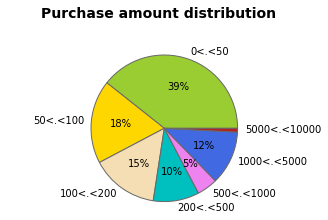

In [4]:
########PROCEDURES: LOAD & DISPLAY

#####LOAD DATASET
def loadData():
    #Download a file based on his path
    path=pathRoot+'taobao.xlsx'
    #Read the excel file and create the Panda Dataframe object:
    dataset_init = pd.read_excel(path)
    #Drop the rows where the translated title is null. 
    dataset_init.dropna(axis = 0, subset = ['title EN'], inplace = True) 
    #Drop all the columns we will not use below.
    dataset_init = dataset_init.drop(['title', '_id','index','shop','colour', 'keyword'] , axis=1)
    print ('\033[1m'+"Shape initial dataset (data_init):"+'\033[0m', dataset_init.shape)
    #BEWARE: by removing these lines, the dataframe index have not changed
    #RESET Index:
    dataset_init.reset_index(inplace = True, drop=True)#index not added as a column
    #Display last rows of the dataset:
    print ('\033[1m'+'\033[94m'+"Last rows of the initial dataset:"+'\033[0m')
    display(dataset_init.tail())
    #Update the number of items in dataset.
    nTotal=dataset_init.shape[0]
    return dataset_init, nTotal
 
#Display the item i: title and image
def displayItem(ind):
  print(dataset_init['title EN'][ind]) 
  strURL=dataset_init.at[ind,'image']
  if isinstance(strURL, str):#In case non empty
      url='https:'+ strURL 
      return url

#Display "nI" Random Items. Only text here.
def displayItems(nI):
  urls=[]
  for i in range(nI):
    url=displayItem(np.random.randint(0, nTotal))
    urls.append(url)
  return urls

#Output the Pie chart of Price distribution
def distributionPrice(price_range):
  price_range = [0, 50, 100, 200, 500, 1000, 5000, 10000]
  count_price = [0,0,0,0,0,0,0]#count in each category
  #Count purchase in each category
  for price in dataset_init['price']:
    for i in range(len(price_range)):
      if i>0: 
        if (price_range[i-1] < price) & (price <= price_range[i]):
          count_price[i-1]+=1
  # Pie Chart Diagram     
  f, ax = plt.subplots(figsize=(5, 3))
  colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
  labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
  sizes  = count_price
  explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
  ax.pie(sizes, explode = explode, labels=labels, colors = colors,
         autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
         shadow = False, startangle=0)
  ax.axis('equal')
  f.text(0.5, 1.01, "Purchase amount distribution", ha='center', fontsize = 14, weight='bold');

  
  
########LOAD Data
dataset_init, nTotal=loadData()   

#DISPLAY Average purchase price: Pie chart of price distribution
print('\033[1m'+'\033[94m'+'Mean Purchase in RMB:'+'\033[0m', dataset_init["price"].mean(),'\n'+'\n') #Mean of purchased items
distributionPrice([0, 50, 100, 200, 500, 1000, 5000, 10000])


### What's in there?

Look at the distribution of price, and at a few elements. Feel free to modify these **examples** to look at different elements.

The dermal layer of leather bed 1.8 m double marriage bed modern minimalist leather bed tatami European master bedroom


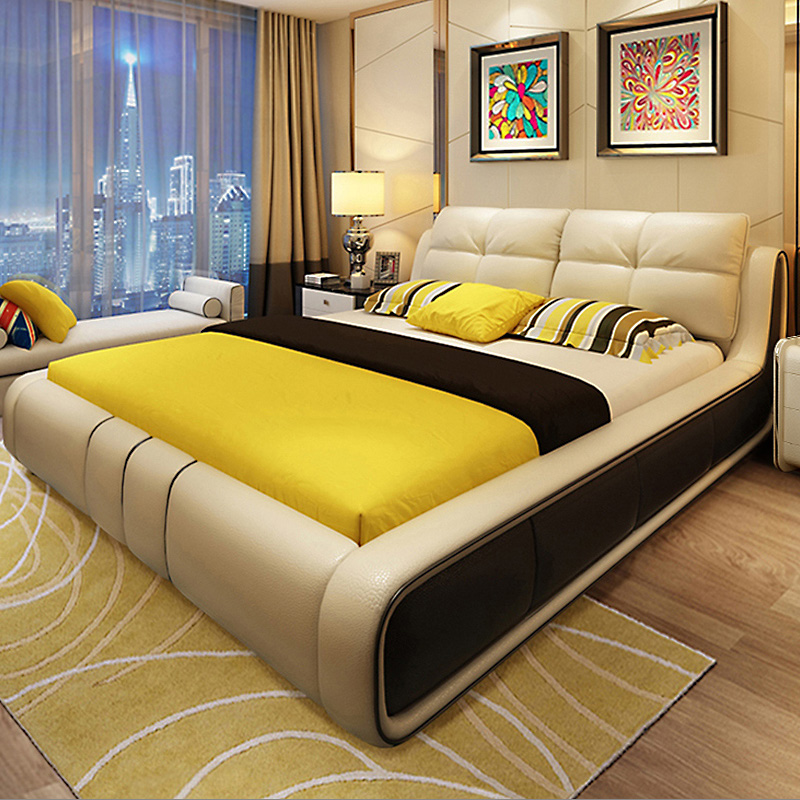

This timeline 365 2020 schedule of work log to act in a calendar week schedule sub-notebook efficiency manual notebook hand account books


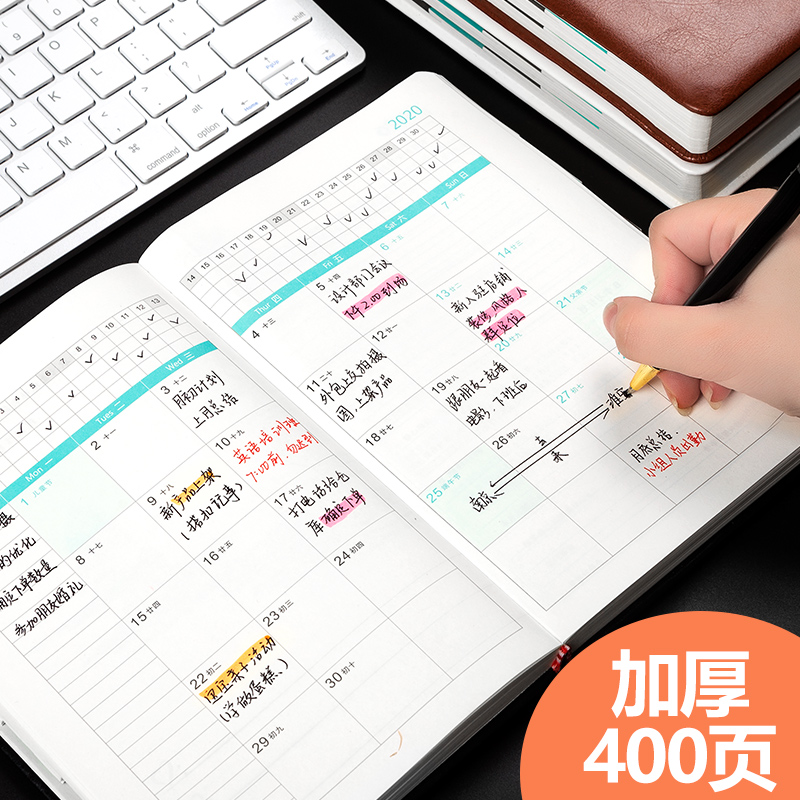

Cushion fart cushion latex cushion pad on the ground sedentary students cool summer breathable cushion stool chair


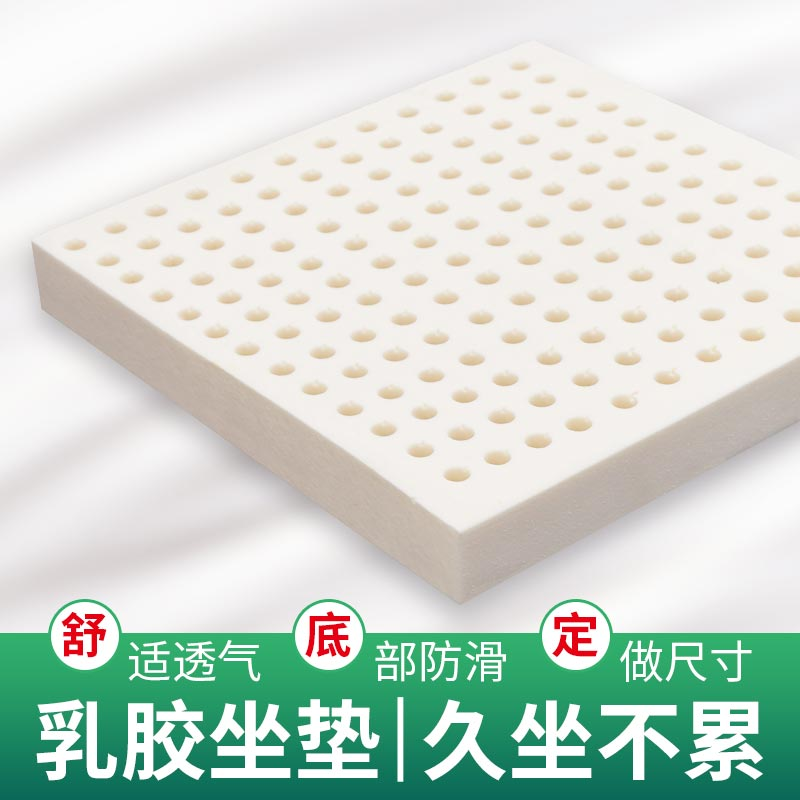

HyunA wind short-sleeved t-shirt women's 2019 new wave of ultra-short-sleeved cotton short-sleeve loose fire cec Korean compassionate summer


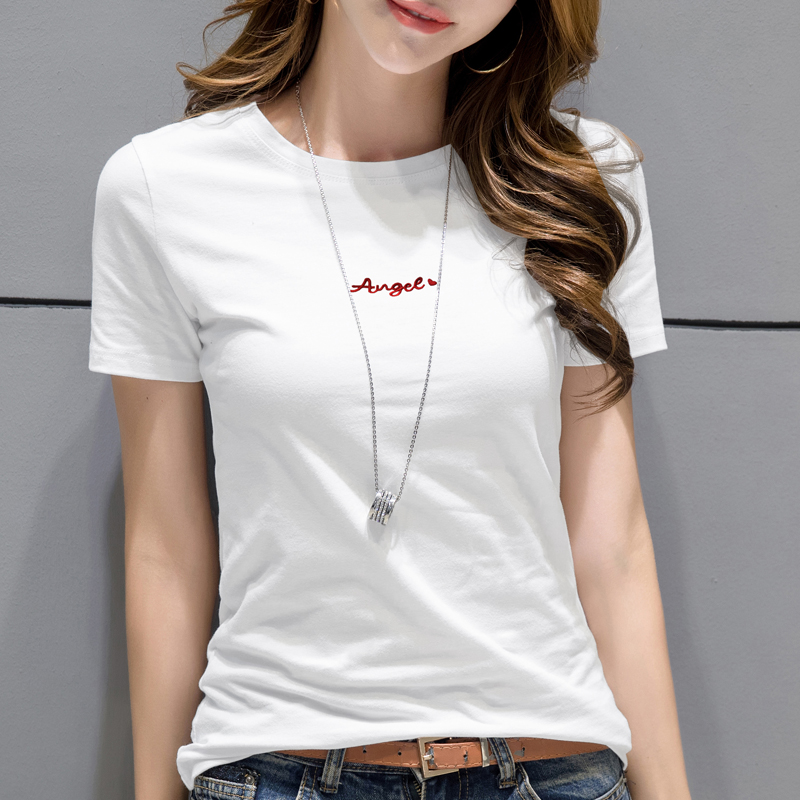

In [5]:
######EXAMPLES

#Display one element (title and picture)
url=displayItem(100)#in argument, the index of the item in the dataset
display(Image(url, width = 100))
url=displayItem(1200)
display(Image(url, width = 100))
url=displayItem(1800)
display(Image(url, width = 100))
url=displayItem(5800)
display(Image(url, width = 100))

## 1.2. Distill the Data

Once the raw data is loaded, it is common to 'clean' and analyze a bit further the data we have, in order it fits better the problem we aim at.

###Keyword Distillation
The item titles as such contain too many variations which are not semantically interesting, such as small words, prepositions, rare words, verb conjugations, etc. We would like to distill these words into keywords to keep their semantic essence.

- In the procedure *distillTitles* in the code below, each english title will be converted into a list of keywords. 
For a more simple, and relevant outcome, the procedure *cleanTitles()* below does several steps:
  - Removing the capital letters
  - Dropping all the words which do not seem particularly relevant for our semantic interpretation
  - *Stemming*: replacing each word by its root (with nltk SnowballStemmer module) 
  - Counting the frequency of these roots, and removing the roots that are not frequent enough
  - Convert the roots back to the smaller real English words (Because the stemming process does not necessarily result in English words.)
  - Remove (if any) duplicates in the list of titles now (unordered) later check set(x)==set(y)
  
- The procedure *removeDouble* in the code below remove the duplicate items which now share the same distilled titles. 

- The procedure *UpdateData* return a new dataset, with the new distillated titles.


•••••••*Run the code below.*•••••••

In [6]:
##########PROCEDURES

#DISTILL Item Titles into List KEYWORDS
#Beware of the distinction between the roots (obtained from words stemming, often not a proper english word) 
#and the keywords (the actual words we will retain for later on).
#Example: To each of the word "writing", "writer", "write" is associated the root "writ". 
#If present in the dataset, "write" will be the keyword associated to all

def distillTitles(df, threshold = 8, colonne = 'title EN'):
    stemmer = nltk.stem.SnowballStemmer("english") #Stemmer
    roots = [] #List roots
    roots_words  = dict()  # collect all the words associated to a root. 
    roots_count  = dict() #count frequencies appearance of a root
    roots_key = dict() #To each root will associate one keyword
    listTitles = []    #Here titles are seen as list of roots
    distillTitles = [] #Here titles are seen as list of keywords. Not frequent keywords removed here.
    roots_ordered =[] #Ordered by frequencies
    keywords =[] #This list of used keywords is ordered by frequencies and contains only keywords above threshold (so one we keep).
    for s in df[colonne]:
        if pd.isnull(s): continue
        lines = s.lower() #lower capital
        tokenized = nltk.word_tokenize(lines) #list of token
        tokenized = list(dict.fromkeys(tokenized))#remove doubles
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if pos =='NN'] 
        adj = [word for (word, pos) in nltk.pos_tag(tokenized) if pos =='JJ']
        adv = [word for (word, pos) in nltk.pos_tag(tokenized) if pos =='RB'] 
        verb = [word for (word, pos) in nltk.pos_tag(tokenized) if pos in ['VB','VBP','VBD', 'VBN']]
        words_list = nouns + adj + adv + verb 
        newTitle=[]
        #First, look at which are the present roots
        for t in words_list: #Have remove already many words, which are not of previous type
            if len(t)>2: #Dont pay attention if words too small
                t = t.lower()
                racine = stemmer.stem(t) #take root word
                if racine not in newTitle: #Update title with only these roots
                    newTitle.append(racine)
                if racine in roots:                
                    roots_words[racine].add(t)
                    roots_count[racine] += 1                
                else:
                    roots.append(racine) 
                    roots_words[racine] = {t}
                    roots_count[racine] = 1
        listTitles.append(newTitle)
    #Build roots_key: To each root, associate a keyword.
    for racine in roots:
        min_length=1000
        for w in roots_words[racine]:
            if len(w) < min_length:
                min_length = len(w)
                roots_key[racine] = w
    #List of ordered roots by frequencies
    for r,v in roots_count.items():
        roots_ordered.append([r,v]) 
    roots_ordered.sort(key = lambda x:x[1], reverse = True)
  
    #Build keywords: list of ordered keywords by frequencies above threshold occurrence
    for rv in roots_ordered:
        if rv[1] > threshold: 
            k = roots_key[rv[0]]
            #Check if keyword is a composed word, divide into 2 parts and only take first
            newk=k.split("-")[0]
            keywords.append(newk)
  
    #Update Title made of roots to title made of smaller keywords
    #And below a certain frequency of keywords, would be removed from titles  
    for s in listTitles:
        newTitle=[]
        for r in s:# a token: currently a root
            if roots_count[r] > threshold:
                newTitle.append(roots_key[r]) #append the keyword!
        distillTitles.append(newTitle)
    
    return distillTitles, keywords, roots_ordered

#Procedures to translate titles (list of words) into specific strings. will be used later
def readT(title):
  newTitle="["+ " ".join(title) + "]"
  return newTitle
#Unnecessary
def readT2(title):
  return " ".join(title)

#LIST the Duplicates
#Procedure which lists the index of the duplicates (in a list of a list of string).
def listDouble(listT):  
  uniqueTitles = [] #Temporary list of titles
  duplicateRows=[] #Keep in memory the list of duplicate row index.
  for (index,t) in enumerate(listT):
      isIn=False
      i_=0
      while ((not isIn) and (i_<len(uniqueTitles))):#Look if t is in uniqueTitles
        tt=uniqueTitles[i_]
        if all(elem in tt for elem in t):#Means s contains all element in t, so do not add t
          isIn=True
          duplicateRows.append(index)#Index t add to the lines we will remove
        i_+=1
      if not isIn:
        uniqueTitles.append(t)
  return duplicateRows, uniqueTitles

#REMOVE the duplicate
#Take a dataframe and remove the rows corresponding to duplicate indices in listT
def removeDouble(df, listT):
  duplicateR, uniqueT=listDouble(listT)
  newdf=df.copy()
  for ind in duplicateR:
    newdf.drop(ind, inplace=True)
  #Add new Titles to dataFrame df
  newdf['new Titles']= uniqueT
  return newdf, uniqueT


#Update Dataset: with a column about distillated Titles, remove the image one, and add 
def updateData(df):
  print('Previous Dataset dimensions:', df.shape) 
  distilledTitles, keywords, roots_ordered = distillTitles(df, 8, colonne = 'title EN')
  newdf=df.copy()
  #Drop price 
  newdf = newdf.drop(['price'] , axis=1)
  #Remove double
  newdf, newTitles=removeDouble(newdf, distilledTitles)
  print('New dataset dimensions:', newdf.shape)
  nTotal=newdf.shape[0] #Update number total items
  display(newdf.tail())
  return newdf, keywords, roots_ordered, newTitles
 

######UPDATE the new dataset:
newData, keywords, roots_ordered, newTitles=updateData(dataset_init)
newIndex=newData.index.values.tolist()#List index of this new dataset (different than data_init)
nKeywords= len(keywords)
print("Number of keywords:", nKeywords)
nTotal=newData.shape[0]#Update number Items

Previous Dataset dimensions: (9746, 5)
New dataset dimensions: (8692, 5)


,image,title EN,Label#pos,Label#neg,new Titles
9741,//g-search3.alicdn.com/img/bao/uploaded/i4/i3/...,Hat male Korean tide thin summer cool handsome...,NaN,NaN,"[tide, summer, cool, brand, baseball, sun, mal..."
9742,//g-search1.alicdn.com/img/bao/uploaded/i4/i1/...,Scarecrow men's leather belt buckle automatica...,NaN,NaN,"[leather, belt, buckle, gift, scarecrow, pure,..."
9743,//g-search2.alicdn.com/img/bao/uploaded/i4/i1/...,925 sterling silver necklace fitness dumbbell ...,NaN,NaN,"[sterling, silver, necklace, fitted, dumbbell,..."
9744,//g-search1.alicdn.com/img/bao/uploaded/i4/i4/...,Zhuo Vatican Armani men's casual leather belt ...,NaN,NaN,"[leather, buckle, influx, fashion, casual, mal..."
9745,//g-search3.alicdn.com/img/bao/uploaded/i4/i3/...,Scarecrow young men wild belt leather belt Kor...,NaN,NaN,"[scarecrow, student, simple, buckle, young, wi..."


Number of keywords: 1708




## 1.3 Look at What You've Got

The dataset is the raw matter from which the machine learning algorithms emerge. It is important to look deeper into the data we have got.

### Keywords Cloud
The code below looks at the distribution of the keywords in our Taobao dataset. We also display a few examples of new titles (as list of keywords), and we can test the occurence of one keyword.

•••••••*Run the code below.*•••••••



Some examples of keywords in the dataset:
four glaze scooter retrofit ceramic rust upscale zinc cod shock large thread steamer bmw shaft relationship ernie unlimited android john jade pigeon

Some examples of distilled titles:
[cotton female waist lace seamless modal antibacterial underwear small japanese-style high big ms. sexy]
[autumn dress busy leather dad breathable hollow middle-aged casual]
[face bag anime student summer smiley spoof loose short-sleeve t-shirt secondary yuan]
[neck massage multi-function pulse meter shoulder guard smart]

Number of occurrences of some keywords:
Occurrences of wood : 425
Occurrences of book : 154
Occurrences of face : 201
Occurrences of real : 28

Keywords Cloud:



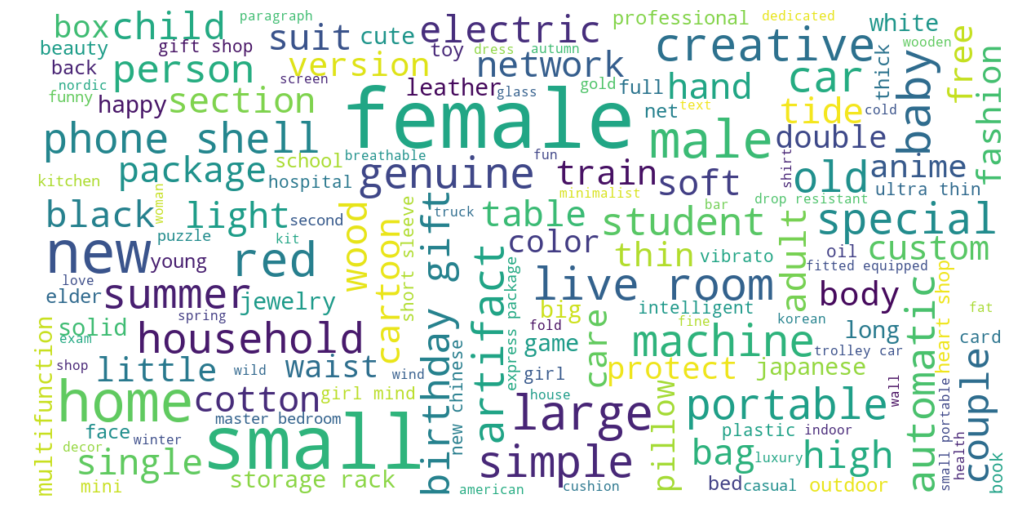

In [8]:
############PROCEDURES
#Keyword Occurence
def keywordOccurrence(word):
  ind= keywords.index(word)#index of the word
  print("Occurrences of "+ word+ " :", roots_ordered[ind][1])#occurrence of this word

#KEYWORD OCCURENCE DIagram
def keywordsOccurrenceDiag():
  print ('\n'+'\033[1m'+'\033[94m'+"Diagram of most frequent keywords in Taobao dataset:"+'\033[0m'+'\n')
  #_______________________________
  plt.rc('font', weight='normal')
  fig, ax = plt.subplots(figsize=(7, 25))
  y_axis = [i[1] for i in roots_ordered[:100]]
  x_axis = [k for k,i in enumerate(roots_ordered[:100])]
  x_label = [k for k in keywords[:100]]
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 13)
  plt.yticks(x_axis, x_label)
  plt.xlabel("Nb. of occurences", fontsize = 15, labelpad = 5)
  ax.barh(x_axis, y_axis, align = 'center')
  ax = plt.gca()
  ax.invert_yaxis()
  #_______________________________________________________________________________________
  plt.title("Keywords occurence",bbox={'facecolor':'xkcd:saffron', 'pad':5}, color='w',fontsize = 20)
  plt.show()

#WORD CLOUD
#Generate word clouds of keywords by occurence in a text
def wordCloud(textList): 
  print ('\n'+'\033[1m'+'\033[94m'+"Keywords Cloud:"+'\033[0m'+'\n')
  #First create long string with all cleaned Titles
  allText=""
  for ti in textList:
      allText += ', '.join(ti)
  #Generate word cloud
  wordcloud = WordCloud(max_font_size=100, min_font_size=4, width=1200, height=600, max_words=150, background_color="white").generate(allText)   
  # Display the generated image:
  plt.figure(figsize=[18,9])
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

#############EXAMPLES
#Print some random examples of keywords
print ('\n'+'\033[1m'+'\033[94m'+"Some examples of keywords in the dataset:"+'\033[0m')
print(keywords[np.random.randint(0, nKeywords)] , keywords[np.random.randint(0, nKeywords)] , keywords[np.random.randint(0, nKeywords)] , keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0,nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0, nKeywords)],keywords[np.random.randint(0,nKeywords)])

#Display some examples of distilled titles
print ('\n'+'\033[1m'+'\033[94m'+"Some examples of distilled titles:"+'\033[0m')
print(readT(newTitles[np.random.randint(0, nTotal)]))
print(readT(newTitles[np.random.randint(0, nTotal)]))
print(readT(newTitles[np.random.randint(0, nTotal)]))
print(readT(newTitles[np.random.randint(0, nTotal)]))
  
#Display the occurence of a specific keyword (has to belong to keywords)
print ('\n'+'\033[1m'+'\033[94m'+"Number of occurrences of some keywords:"+'\033[0m')
keywordOccurrence("wood")
keywordOccurrence("book")
keywordOccurrence("face")
keywordOccurrence("real")

#DISPLAY the most frequent keywords occurrence diagram
#keywordsOccurrenceDiag() 

#Draw the keyword cloud of the TaoBao items
wordCloud(newTitles)




#2. Semantic Encoding





---

### `**About models and representations** `

- ML relies on the quantification of attributes (input or target) and
it is worth questioning beforehand: why do we measure stuff? What is the underlying theory in terms of worldview carried by this process and our choices?
-'*The problem got the solution it deserve.*' Deleuze
- **Each of these models carry a world view**. 
- A famous saying in statistics: *'All models are wrong but some are useful'*. (Cf. [this](https://plato.stanford.edu/entries/models-science/).)
In other words, **“The map is not the territory”**. (Cf. [this](https://en.wikipedia.org/wiki/Map%E2%80%93territory_relation).)


---




Here, the data we are using is mostly textual data (Taobao's titles more precisely). In order to run any kind of machine learning algorithm and data analysis on this content, we would need to quantify this data: for instance, each word, or piece of text shall be represented by (*'encoded into'*) a vector. 

In this part, we will succinctly explore different semantic encodings, -first for words, then for TaoBao items (seen for now as a list of words).
Each of these representations has a different **metric space** and a notion of **semantic distance** associated to it. These wanderings in semantic spaces have a foretaste of certain algorithmic subjectivities.

## 2.1. Words to Vectors

In order to capture and represent the context of a word in a document, semantic and syntactic similarity, and its relation to other words, we typically use *word embeddings*.

**Word embeddings** refers to models which map a set of words or sentences in a vocabulary to vectors in a high dimensional space (with numerical values).
A 'good' representation should ideally reflect some semantic context: each word is represented by a vector, in such a way that more words are similar (or words with similar semantic context), more their angle should be "close" to 0 (ie, cosine similarity close to 1). Intuitively, we would like the word-Vector "mango" to be closer to the word-Vector "tree" than to the word-Vector "massage" or "president". 


 Traditionnally, a few approaches (BOW, TD-IDF) towards words similarity metrics were count based approaches: looking at the histogram of words occurences in documents. These approaches were often not capturing well enough the semantic relations between the words. Distributional approaches, such as Word2Vec assume that words occuring in same context tend to have a similar meaning and try to learn a *good* representation for each word according to the input data (corpus of texts) we feed it: more it would see two words in a same context (sequence of 'n' consecutive words), more it will assume they are likely to be semantically close. From different datasets, naturally emerge different metrics and notions of distance as we will see. 

### Create the Words embeddings


 
Below, we explore three different predictive contextual models built from Word2Vec from different corpus, and one model built from GloVe (all via Gensim open source library). 
 
 

*More details for the curious ears about these models: *

  - *modelTaoCBOW*: Word2Vec CBOW (continuous bag of words) model, trained on Taobao data. Word2Vec is a shallow Neural Network (one hidden layer, dimension d), and can be found in two forms: CBOW, or Skipgram. This CBOW version takes the context of each word as the input and tries to predict the word corresponding to the context.
  - *modelSkip*: Skip-gram model, trained on Taobao data.
  It is a sort of CBOW model flipped:  it takes in input the target word into the network and outputs C (one for each context) probability distributions of V probabilities, one for each word. What does this mean?
  - *modelGoogle*: Word2Vec Google model ("Google Code Project"), trained on Google news data (containing about 100 billion words), using 300-dimensional word vectors. 
  - *modelGlove*: Model from GloVe pretrained on wikipedia data. While Word2Vec is a "predictive" model that predicts context given word or word given contexr, GloVe learns by constructing a co-occurrence matrix (words X context) that basically count how frequently a word appears in a context and then use dimensionality reduction.

*More references in the appendix about these word embeddings.*
 
 


In [9]:
#########CREATE 4 WORD EMBEDDING MODELS
#Can take 1-5 minutes.

#Create CBOW model. 
modelTaoCBOW = gensim.models.Word2Vec(newTitles , min_count = 1,  size = 100, window = 5) 
print("modelTaoCBOW successfully created.")

# Create Skip Gram model 
modelTaoSkip = gensim.models.Word2Vec(newTitles, min_count = 1, size = 100, window = 5, sg = 1) 
print("modelTaoSkip successfully created.")
#Create Google model
path=pathRoot+ 'GoogleNews-vectors-negative300.bin'   #download Google model
modelGoogle = KeyedVectors.load_word2vec_format(path , binary=True)
#KeyedVectors are smaller and need less RAM, but they don’t need to store the model state that enables training.
print("modelGoogle successfully created.")

#Model from GloVe pretrained on wikipedia data. 
modelWikiGlove = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data
print("modelWikiGlove successfully created.")

#Glove model pretrained on Twitter Data
modelTwitterGlove = api.load("glove-twitter-25") #glove-twitter-25 (104 MB)  
print("modelTwitterGlove successfully created.")


modelTaoCBOW successfully created.
modelTaoSkip successfully created.
modelGoogle successfully created.
[==================================================] 100.0% 128.1/128.1MB downloaded
modelWikiGlove successfully created.
[==================================================] 100.0% 104.8/104.8MB downloaded
modelTwitterGlove successfully created.


### Word Space Overview

See the overall distribution of the keywords in our dataset, according to the model TaoCBOW.

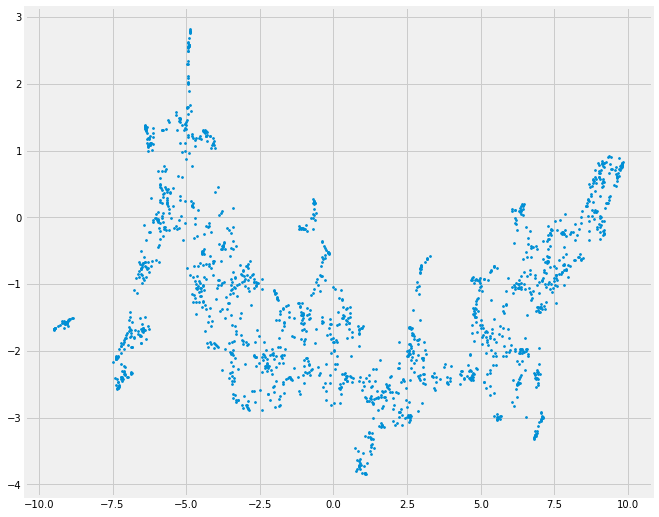

In [321]:
# Extract all vectors of the model TaoCBOW
TaoWords = modelTaoCBOW[modelTaoCBOW.wv.vocab]
#See these items as a cluster:
TaoWordsCluster = umap.UMAP(n_neighbors=30, min_dist=0.0,n_components=2, random_state=42).fit_transform(TaoWords)
plt.figure(figsize=(10,9))
plt.scatter(TaoWordsCluster [:, 0], TaoWordsCluster[:, 1], s=3, cmap='Spectral')

## 2.2. Word Semantic Space

Each Word Embedding model is associated to a different semantic space, which reflects the corpus of texts it has been trained on. 
While large corpus like Wikipedia or Google model naturally seems more reasonnable, the two other models (modelTaoCBOW and modelTaoSkip) somehow echo a weird/wicked semantic emerging from TaoBao data.

*Nota Bene: The similarity metric used here between two words is the cosine similarity, which is the angle between two vectors associated to each word.*


•••••••*Run the code below, before playing with the examples in the next two snippets.*•••••••


In [10]:
#SEMANTIC SPACE, PROCEDURES

#Procedure for nearest words, or similarity between 2 words.
def mostSimilarWords(model, word1, nbS):
    sim = model.most_similar(word1, topn=nbS)[:nbS] #element 1
    listSim=""
    for el in sim:
      listSim += el[0] + " (sim=" + str(round(el[1],3)) + "), "
    print("Most similar words to '", word1, "': ", listSim)

def similarityBetween(model, word1, word2):
    print("Similarity between '", word1, "' and '", word2, "' : ", round(model.similarity(word1, word2),3))

#For word arithmetic (cf. below)
def wordArithmetic(model, positives, negatives):
    arithm = model.most_similar(positive=positives, negative=negatives, topn=1)[0] #element 1
    pos=' + '.join(positives)
    neg=' - '.join(negatives)
    print(pos, "-", neg, " = ", arithm[0], ",  with a similarity of ", round(arithm[1],3))

print("Procedures successfully defined.")

Procedures successfully defined.



---

###`**Explore the Semantics. **`
Play with the examples below by changing the words and looking at the similarity metric, and nearest words for each model.

---



In [25]:
#SEMANTIC DISTANCE, EXAMPLES

print('\033[1m'+'\033[94m'+"Taobao CBOW Word2Vec model"+'\033[0m')
model = modelTaoCBOW
mostSimilarWords(model, "nordic",5)
mostSimilarWords(model, "genuine",5)
similarityBetween(model, "girlfriend", "girl")
similarityBetween(model, "girlfriend", "silicone")
similarityBetween(model, "girlfriend", "equipped")

print ('\n'+'\033[1m'+'\033[94m'+"Taobao Skip Gram Word2Vec model"+'\033[0m') 
model = modelTaoSkip
mostSimilarWords(model, "nordic",5)
mostSimilarWords(model, "genuine",5)
similarityBetween(model, "girlfriend", "girl")
similarityBetween(model, "girlfriend", "silicone")
similarityBetween(model, "girlfriend", "equipped")

print ('\n'+'\033[1m'+'\033[94m'+"Google Word2Vec model"+'\033[0m') 
model = modelGoogle
mostSimilarWords(model, "nordic",5)
mostSimilarWords(model, "genuine",5)
similarityBetween(model, "girlfriend", "girl")
similarityBetween(model, "girlfriend", "silicone")
similarityBetween(model, "girlfriend", "equipped")


print ('\n'+'\033[1m'+'\033[94m'+"Wiki GloVe model"+'\033[0m') 
model = modelWikiGlove
mostSimilarWords(model, "nordic",5)
mostSimilarWords(model, "genuine",5)
similarityBetween(model, "girlfriend", "girl")
similarityBetween(model, "girlfriend", "silicone")
similarityBetween(model, "girlfriend", "equipped")

print ('\n'+'\033[1m'+'\033[94m'+"Twitter GloVe model"+'\033[0m') 
model = modelTwitterGlove
mostSimilarWords(model, "nordic",5)
mostSimilarWords(model, "genuine",5)
similarityBetween(model, "girlfriend", "girl")
similarityBetween(model, "girlfriend", "silicone")
similarityBetween(model, "girlfriend", "equipped")

Taobao CBOW Word2Vec model
Most similar words to ' nordic ':  modern (sim=0.999), table (sim=0.998), wood (sim=0.998), solid (sim=0.997), double (sim=0.997), 
Most similar words to ' genuine ':  liquid (sim=0.991), pigeon (sim=0.99), laundry (sim=0.99), refine (sim=0.989), given (sim=0.989), 
Similarity between ' girlfriend ' and ' girl ' :  0.996
Similarity between ' girlfriend ' and ' silicone ' :  0.399
Similarity between ' girlfriend ' and ' equipped ' :  0.244

Taobao Skip Gram Word2Vec model
Most similar words to ' nordic ':  japanese-style (sim=0.966), economy (sim=0.966), european-style (sim=0.964), scandinavian (sim=0.96), american (sim=0.955), 
Most similar words to ' genuine ':  authentic (sim=0.885), solution (sim=0.862), liquid (sim=0.824), enhance (sim=0.81), literature (sim=0.807), 
Similarity between ' girlfriend ' and ' girl ' :  0.922
Similarity between ' girlfriend ' and ' silicone ' :  0.54
Similarity between ' girlfriend ' and ' equipped ' :  0.092

Google Word2Vec

---

###`**Look at Word Arithmetics.**`
Play with the examples below, by changing the words, and looking at the word arithmetic, according a different model.


Once we have such distributed representations (above-mentioned vectorised words), it enables us to do arithmetics with words. In some examples, we can intuitively foresee what certain operations should put out, such as: 
- (king - man) + woman = queen
- (Paris - France) + Chine = Beijing
Other examples may be more intriguing or obscure.

NB: More precisely, the vectors associated to these words should more or less satisfy these equations.


---

In [37]:
#WORD ARITHMETIC
#The first list of argument are the ones in front of a + sign while the second list are the negative arguments

print('\033[1m'+'\033[94m'+"Taobao CBOW Word2Vec model"+'\033[0m')
model=modelTaoCBOW
wordArithmetic(model, ['woman', 'king'], ['man'])
wordArithmetic(model, ['girlfriend', 'happy'], ['silicone'])
wordArithmetic(model, ['phone', 'minimalist'], ['luxury'])
wordArithmetic(model, ['couple', 'happy'],['environmental'])

print('\n'+'\033[1m'+'\033[94m'+"Google Word2Vec model"+'\033[0m')
model= modelGoogle
wordArithmetic(model, ['woman', 'king'], ['man'])
wordArithmetic(model, ['girlfriend', 'happy'], ['silicone'])
wordArithmetic(model, ['planet', 'future'], ['utopia'])
wordArithmetic(model, ['couple', 'happy'],['environmental'])


print('\n'+'\033[1m'+'\033[94m'+"Twitter GloVe model"+'\033[0m')
model= modelTwitterGlove
wordArithmetic(model, ['woman', 'king'], ['man'])
wordArithmetic(model, ['girlfriend', 'happy'], ['silicone'])
wordArithmetic(model, ['planet', 'future'], ['utopia'])
wordArithmetic(model, ['climate', 'waste'],['environment'])

Taobao CBOW Word2Vec model
woman + king - man  =  afford ,  with a similarity of  0.998
girlfriend + happy - silicone  =  day ,  with a similarity of  0.996
phone + minimalist - luxury  =  shell ,  with a similarity of  0.972
couple + happy - environmental  =  silicone ,  with a similarity of  0.903

Google Word2Vec model
woman + king - man  =  queen ,  with a similarity of  0.712
girlfriend + happy - silicone  =  fiancee ,  with a similarity of  0.58
planet + future - utopia  =  oceans ,  with a similarity of  0.403
couple + happy - environmental  =  few ,  with a similarity of  0.506

Twitter GloVe model
woman + king - man  =  meets ,  with a similarity of  0.884
girlfriend + happy - silicone  =  birthday ,  with a similarity of  0.829
planet + future - utopia  =  more ,  with a similarity of  0.897
climate + waste - environment  =  blame ,  with a similarity of  0.865


---

###`**Exploring Neighborhoods of Words.**`

---

Since words-vector are now embedded into high dimensional vector spaces (like 300 Dimensions some), in order to visualize them and their semantic neighborhood on our screen, we have to project these vectors onto a 2D space in a *pertinent* way. Indeed, certain perspectives result in better visibility than others. Common techniques for such projections are PCA (principal component analysis), or tSNE (T-distributed Stochastic Neighbor Embedding). *Cf. Appendix*

•••••••*Run the code below, and feel welcome to look at the neighborhood of any other word in any other model in the examples below.*•••••••


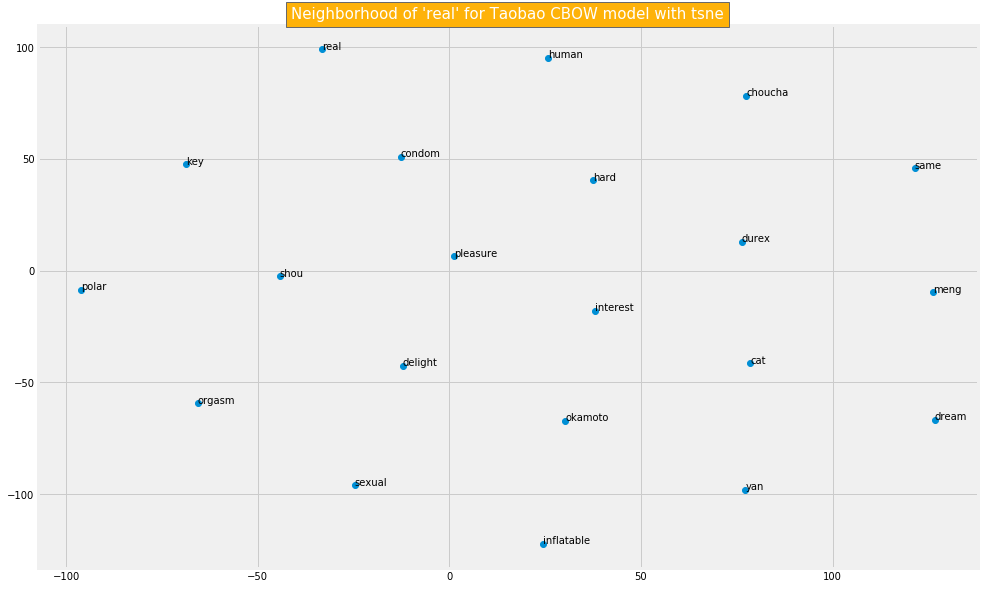

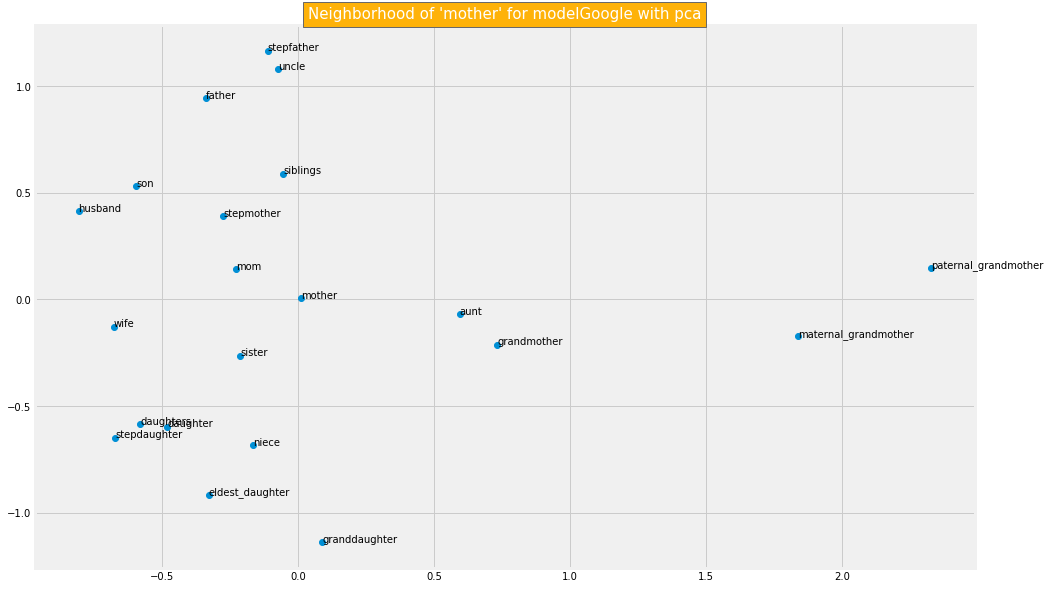

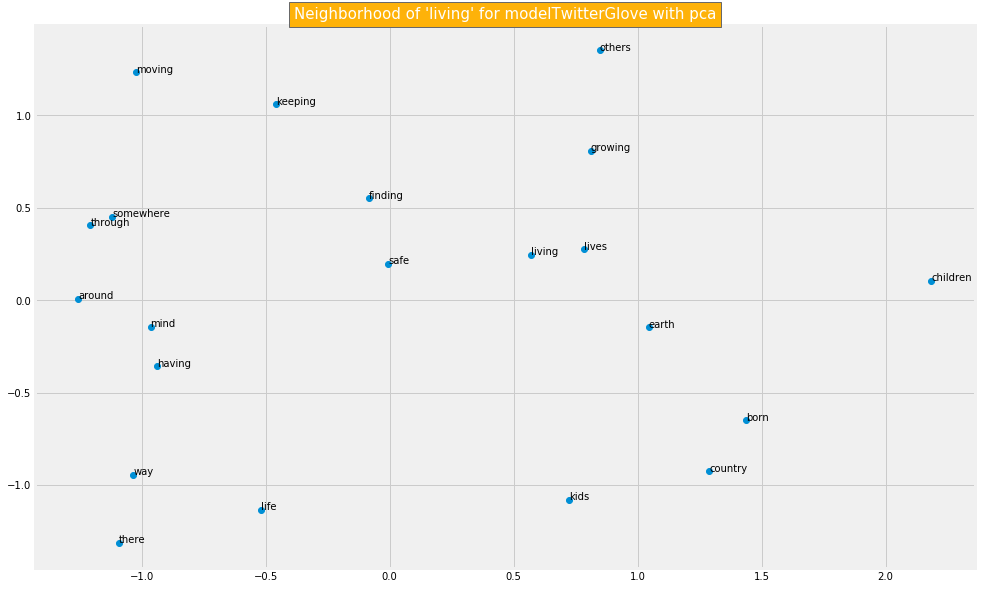

In [11]:
#######The NEIGHBORHOOD of a Word

#PROCEDURE
#Procedure which display neighborhoods via tSNE or PCA.
def displayNeighborhoodWord(model, word, nbN, typeproj, namemodel): 
    vectors=[]
    word_labels = [word]
    #Create the neighborhood of the word
    #It is a list of couple (word, similarity)
    #neighborhood = model.similar_by_word(word)[0:nbN] 
    neighborhood = model.most_similar(word, topn=nbN)[0:nbN] 
    #NB: Could use too: model.most_similar(word),most similar entities (can be list positive, negative arguments...) or similar_by_vector top similar words by vectors. 
    
    vectors.append(model[word])
    for neighbor in neighborhood:
        vector_ = model[neighbor[0]]
        word_labels.append(neighbor[0])
        vectors.append(vector_)
    
    if typeproj=="pca": #principal componen analysis
        pca = PCA(n_components=2)
        vectors_proj = pca.fit_transform(vectors) #create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
    elif typeproj=="tsne": #tsne
        tsne = TSNE(n_components=2, random_state=0)
        #np.set_printoptions(suppress=True)
        vectors_proj = tsne.fit_transform(vectors) #Proj
    else:
        return error
    plt.figure(figsize=(15,10))
    x_coords = vectors_proj[:, 0]
    y_coords = vectors_proj[:, 1]
    plt.scatter(x_coords, y_coords)
    #Annotate the points on the graph with the words.
    for i, neighbor in enumerate(word_labels):
	     plt.annotate(neighbor, xy=(vectors_proj[i, 0], vectors_proj[i, 1]))
    title="Neighborhood of '"+ word + "' for "+ namemodel+" with " + typeproj
    plt.title(title,bbox={'facecolor':'xkcd:saffron', 'pad':5}, color='w',fontsize = 15)
    plt.show()

 
#EXAMPLES 
#FEEL free to test some other words, or other models below. 
#Beware: the words have to be in the vocabulary (which, for the modelTao... are simply the 1700 keywords constructed before, 
#whereas Google model neighborhood is huge). 
displayNeighborhoodWord(modelTaoCBOW, "real", 20, "tsne", "Taobao CBOW model") 
displayNeighborhoodWord(modelGoogle, "mother", 20, "pca", "modelGoogle") 
displayNeighborhoodWord(modelTwitterGlove, "living", 20, "pca", "modelTwitterGlove") 



##2.3. TaoBao $emantic Space

Once we have fixed a notion of distance between words, we can infer a notion of **semantic similarity** (and **semantic distance**) between two TaoBao items (seen as a list of words), thanks to Word Mover's Distance (WMD) distance for instance. 

The intution behind WMD is that we find the minimum "traveling distance" between document, in other words the most efficient way to pass from the keyword distribution of document 1 to the keyword distribution of document 2 (word by word). [More about it.](https://markroxor.github.io/gensim/static/notebooks/WMD_tutorial.html)

*A few more precisions:*
- WMD is a measure of distance (between 0 and infinity) whereas WmdSimilarity is a similarity measure (between 0 and 1). 
- Text similarity is about determining how ‘close’ two pieces of text are both in surface closeness (lexical similarity) and meaning (semantic similarity).
- The examples below are often based on the Google Word2Vec model, as semantically more consistent usually. The reader is free to explore these spaces with other semantic models.
- There are other famous algorithms to encode sentence, document (or any sequence of words), such as Doc2Vec or Universal Sentence Encoder. (cf. Appendix)

•••••••*Run the code below with the procedures, and then play with the examples following.*•••••••


### Preliminaries

In [12]:
############PROCEDURES
newIndex=newData.index.values.tolist()#List index of newdata

#Procedure for nearest items in the dataset
#Return the list of indices of the most similar Items
def mostSimilarItems(model, index1, nbS):
  item1=newTitles[min(index1,len(newTitles)-1)]
  listInd=[]
  #We initialize the similarity class with a corpus and a word2vec model
  sims = WmdSimilarity(newTitles, model, num_best=nbS)[item1] #nbS decides how many results the queries return. 
  print('\n'+'\033[1m'+"The closer Taobao items from "+'\033[0m', readT(item1), " are:")
  for i in range(nbS):
      print(readT(newTitles[sims[i][0]]),'\033[1m'+ "with a similarity of "+'\033[0m', round(sims[i][1],3))
      #Could add a threshold on the similarity before adding it to the list.
      listInd.append(sims[i][0])
  return listInd

#Procedure for nearest items in the dataset but which do not print it (integrate with other)
#Return the list of indices of the most similar Items
def mostSimilarItems0(model, index1, nbS):
  item1=newTitles[min(index1,len(newTitles)-1)]
  listInd=[]
  #We initialize the similarity class with a corpus and a word2vec model
  sims = WmdSimilarity(newTitles, model, num_best=nbS)[item1] #nbS decides how many results the queries return. 
  for i in range(nbS):#Could add a threshold on the similarity before adding it to the list.
      listInd.append(sims[i][0])
  return listInd

#Procedure to compute distance between two TaoBao items in the dataset. 
#BEWARE: here the index denotes the row number in newdata, NOT in the original dataset. (Some rows have been suppressed)
#Beware, newdata index is the same than data index, which is therefore different from the row number for newdata.
def distanceItems(model, index1, index2):
    nMax=len(newTitles)
    ind1=min(index1,nMax-1)
    ind2=min(index2,nMax-1)
    item1=newTitles[ind1]#In case enter higher index than dataset
    item2=newTitles[ind2]
    distanceI = round(model.wmdistance(item1, item2),4)
    urls=[]
    for ind in [ind1,ind2]:
      strURL=newData.at[newIndex[ind],'image']
      if isinstance(strURL, str):#if non empty
        url='https:'+ strURL #newIndex[ind] indicate the position in the initial dataset from newdata position
        urls.append(url)
    print("Distance between ", readT(item1))
    print(" and ", readT(item2))
    print(" is:", distanceI)
    return urls #IPython display do not work within function call !
  
  
#From ITEM to VECTOR
#From a title (list of keywords), give the vector, averaging the words vectors, from the word embedding model precised.
def vectorItem(model, title):
    vcts= []
    for word in title:
       if word in model.vocab:#if in vocabulary, else neglect (Well, rough).
          vcts.append(model[word]) #List of vectors 
    avg = np.average(vcts, axis=0) #Average all vectors
    return avg
  
#From a list of word, remove composed words
def removeComposed(list):
  newlist=[]
  for wo in list:
    newword=wo.split("-")[0]
    newlist.append(newword)
  return newlist  
print("Procedures successfully defined.")

Procedures successfully defined.


###TaoBao Space View

Look at the overall distribution of all items in our TaoBao dataset. Each dot represent an item in our dataset.

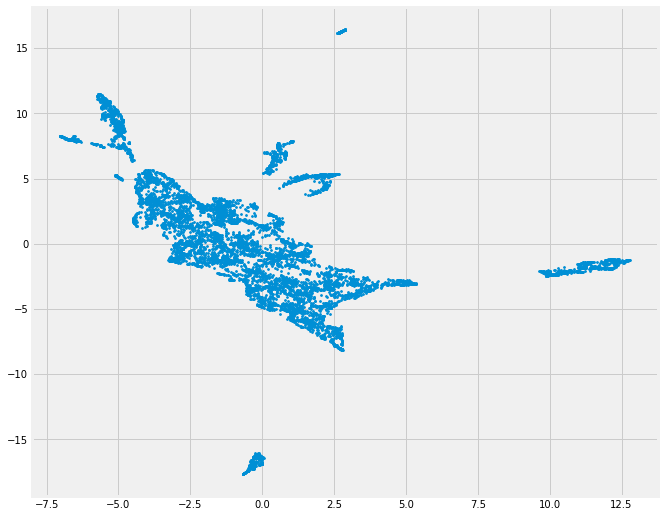

In [13]:
def TaoBaoSpace(model):
    TaoBaoList=[]
    for item in newTitles:
      vct=vectorItem(model, item)
      TaoBaoList.append(vct)
    TaoBaoVectors=np.array(TaoBaoList)
    TaoCluster = umap.UMAP(n_neighbors=30, min_dist=0.0,n_components=2, random_state=42).fit_transform(TaoBaoVectors)
    plt.figure(figsize=(10,9))
    plt.scatter(TaoCluster [:, 0], TaoCluster[:, 1], s=3, cmap='Spectral')
    
    
#See the semantic space of our dataset, according modelTao ('modelTaoCBOW.wv')
#Can replace by 'modelGoogle' too.
TaoBaoSpace(modelTaoCBOW.wv)

### Choose a model

In [14]:
#CHOOSE MODEL
model= modelGoogle
#NORMALIZE IT
#Since WMD distance uses Euclidean distance, we have to normalize the words vectors in the word2vec class.
model.init_sims(replace=True) #Normalise Vector. Can take 3 minutes.
print("Model has been normalised.")

Model has been normalised.



---

###`**Explore TaoBao Semantic Space. **`
Play around with the examples below. By changing the numbers you will switch from items: both to look at the distance between them and identify the closer items.

---

Similarity Examples:

The closer Taobao items from  [mud cloth car wash clay decontamination paint glass magic special]  are:
[mud cloth car wash clay decontamination paint glass magic special] with a similarity of  1.0
[car mill towel clay wash decontamination paint cloth magic mud] with a similarity of  0.795
[car mill towel clay wash decontamination paint clean cloth magic mud] with a similarity of  0.742
[car mill clay cloth towel decontamination wash magic mud] with a similarity of  0.724
[car mill clay cloth towel decontamination wash layer paint magic mud remove] with a similarity of  0.7
[god car wash mud beauty clay clean iron powder paint dedicated] with a similarity of  0.601
[wax car paint conservation polish white special] with a similarity of  0.543

Examples of distance between Taobao items:
Distance between  [winter velvet waterproof car glove female thick cute korean]
 and  [birthday gift heart teacher day custom practice male send shop]
 is: 1.196


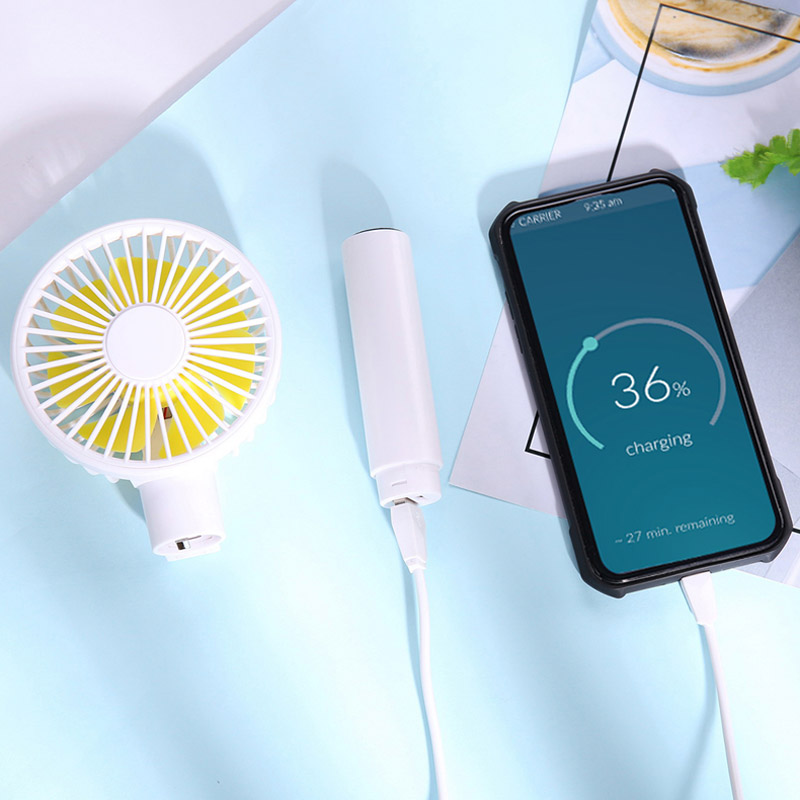

Distance between  [winter velvet waterproof car glove female thick cute korean]
 and  [bath machine household water hot storage-type electric vertical smart easy]
 is: 1.2582


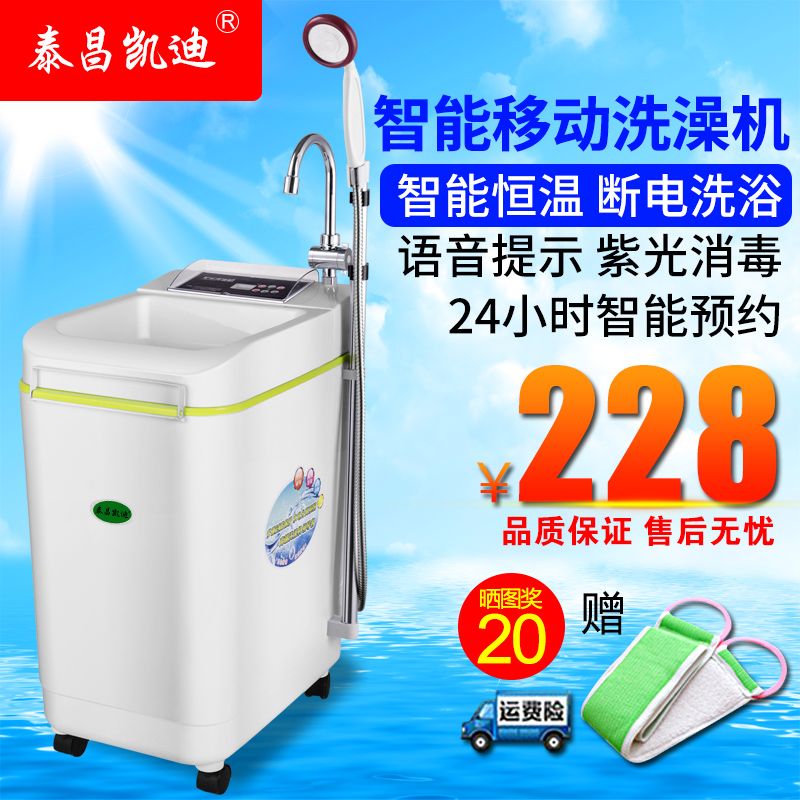

In [15]:
#SIMILARITY EXAMPLES
#Feel free to try out different items, by changing the numbers.
print ('\033[1m'+'\033[94m'+"Similarity Examples:"+'\033[0m')
mostSimilarItems(model, index1=3000, nbS=7)#Beware, nbS should not be too big (would be too slow).

#DISTANCE EXAMPLES
#Feel free to try out different  items by changing the numbers in "distanceItems" (index in new dataset)
print ('\n'+'\033[1m'+'\033[94m'+"Examples of distance between Taobao items:"+'\033[0m') 
urls= distanceItems(model, index1=8, index2=700)
for url in urls:#Display images
  display(Image(url, width = 100))
#IPython.display.Image(url2, width = 200)
urls=  distanceItems(model, index1=8, index2=3400) 
for url in urls:#Display images
  display(Image(url, width = 100))

### `**TaoBao Semantic Neighborhoods** `

The code below enable you to look at the neighborhood of each of these item (j) corresponding to a person (i, numbered).

*A few more precisions:*
- Here, the most similar items are found via WMD distance as above, while the item vectors are simply computed via averaging their word vectors.
- We assume each person brought a list of 'nItem' items, has filled the dataset, and that these items are situated in the top of the initial dataset.

•••••••*Run the code below. Feel free to change (in the 'Example') the index of the person or item you are interested in.*•••••••

The closer Taobao items from  [france tube perfume leather test]  are:
(1) [princess jewelry box leather storage european] , with a similarity of  0.505
(2) [ms. cos leather spring black new] , with a similarity of  0.498
(3) [france infant] , with a similarity of  0.489
(4) [leather bracelet fashion simple european american person import] , with a similarity of  0.489
(5) [ice cream gift box france import] , with a similarity of  0.488
(6) [perfume rose] , with a similarity of  0.488
(7) [tube section cotton summer deodorant cartoon thin] , with a similarity of  0.488
(8) [bmw audi car leather care mercedes interior] , with a similarity of  0.487
(9) [ice cream network france red import] , with a similarity of  0.487


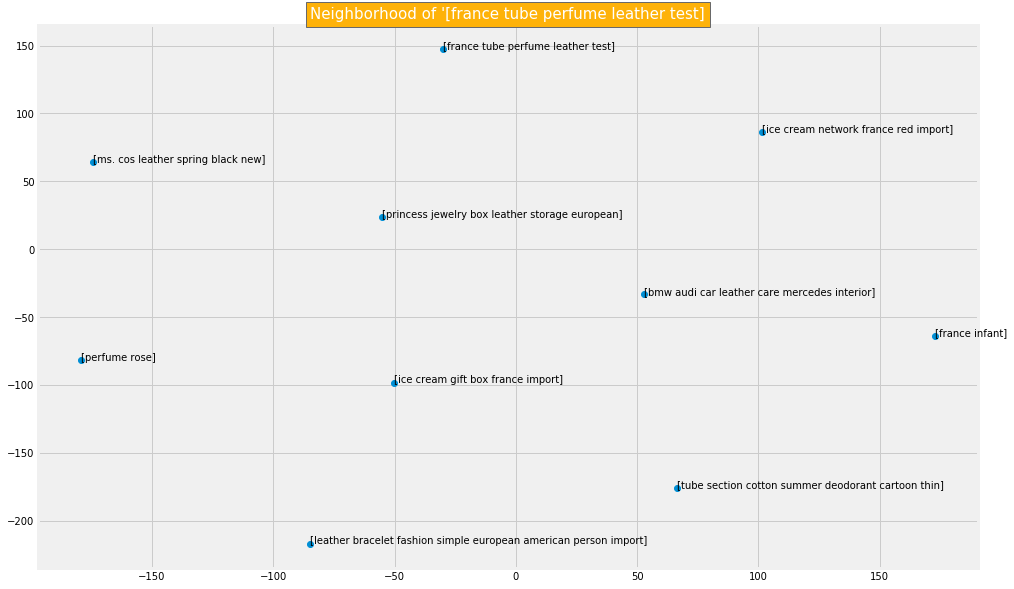

In [16]:
#We assume there are nPerson participants, and each has filled nItem purchased items, 
#These items corresponds to the the first nPerson * nItem lines of the dataset (and f "new Titles").
  

#Display neighborhoods of each item a person bought (closer items)
def neighborhoodTaoBao(model, iPerson, jItem, nbN,typeproj='tsne'): 
    ind=iPerson *nItem + jItem #index of the item we are looking at
    jTitle=removeComposed(newTitles[ind]) #Title of the item we are looking at
    urls=[]#Will list the urls of the images of the neighbors
    #Create the neighborhood of the word
    neighborhood = WmdSimilarity(newTitles, model, num_best=nbN)[jTitle]
    print('\033[1m'+"The closer Taobao items from "+'\033[0m', readT(jTitle), " are:")
    strURL=newData.at[newIndex[ind],'image']
    if isinstance(strURL, str):
      url='https:'+ strURL #Url of the corresponding image
      urls.append(url)
    vcts=[vectorItem(model,jTitle)]
    titles=[jTitle]
    for i in range(1,nbN):
        title=removeComposed(newTitles[neighborhood[i][0]])
        titles.append(title)
        print('\033[1m'+ "("+str(i)+")"+'\033[0m', readT(title), '\033[1m'+ ", with a similarity of "+'\033[0m', round(neighborhood[i][1],3))
        strURL=newData.at[newIndex[i],'image']
        if isinstance(strURL, str):#In case there is an url
            url='https:'+ strURL #Url of the corresponding image
            urls.append(url)
        vcts.append(vectorItem(model,title))#List vectors ofall neighbours
    displayNeighborhoodItem(vcts,titles,typeproj)
    return urls  #return list url to look for image
  
#Procedure, which once has list of vectors, and type of projection, display it.
def displayNeighborhoodItem(vcts, titles, typeproj= 'tsne'): 
    if typeproj=="pca": #principal componen analysis
        pca = PCA(n_components=2)
        vectors_proj = pca.fit_transform(vcts) #create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
    elif typeproj=="tsne": #tsne
        tsne = TSNE(n_components=2, random_state=0)
        #np.set_printoptions(suppress=True)
        vectors_proj = tsne.fit_transform(vcts) #Proj
    else:
        return error
    plt.figure(figsize=(15,10))
    x_coords = vectors_proj[:, 0]
    y_coords = vectors_proj[:, 1]
    plt.scatter(x_coords, y_coords)
    #Annotate the points on the graph with the words.
    for i, neighbor in enumerate(titles):
	     plt.annotate(readT(neighbor), xy=(vectors_proj[i, 0], vectors_proj[i, 1]))
    title="Neighborhood of '"+ readT(titles[0])
    plt.title(title,bbox={'facecolor':'xkcd:saffron', 'pad':5}, color='w',fontsize = 15)
    plt.show()
  
#EXAMPLES
#nbN is the number of neighbours you are interested in. Too high would be too slow.
urls=neighborhoodTaoBao(modelGoogle, iPerson=1, jItem=3, nbN=10, typeproj='tsne') 
#Display the item image 
for url in urls:
  display(Image(url, width = 100))

#3. Alternative Classifier
   
 
 
   




______

### `**About Classification, Clustering and Taxonomies** `

A common practice in predictive analysis is to train **consumer behavior classifiers** or **consumer clustering/segmentation algorithms**, in order to better identify different consumer types and to consolidate predictions about them.

A **classifier** is a type of supervised machine learning algorithm which tries to learn from the labelled data to predict the label (sometimes called class or category) of a new item. This type of algorithm is very common among ML algorithms and can be used quite broadly: recognise if a mail is spam, recognise objects in images, identify the genre of a music piece, etc. Usual consumer classifiers are meant to split people into economical, political social categories in such a way that their consumer or political behavior could be assimilated to the one of the clusters they do belong to.

**Clustering algorithms** are usually unsupervised machine learning algorithms which try to identify different clusters (groups) in the dataset: for instance, consumer clustering algorithms could segment you with similar consumers. SVM (Support Vector Machines) and kNN (k Nearest Neighbours) are common (and simple) ML techniques currently used to cluster consumers. 
In general, these algorithms are trained on a huge set of data, way beyond your transaction data, also with customer profile data, such as the web server log files with all the data about what have you clicked on, how long have you stayed on a page, etc.

These **taxonomies** -as any attempt to characterize the world- often vehiculate a certain vision-and segmentation- of the world, more and less normative, more and less arbitrary, or culturally-specific.

For instance, [this](https://media.cmgdigital.com/shared/news/documents/2014/02/03/see_p_240_PersonicX_Binder.pdf) american clustering system split citizens into 70 clusters within 21 life stage groups. Some example of categories names are: *Urban scrumble, Apple Pie Families, Married Sophisticates,  Country Comfort, Dynamics Duos, Children First, Acred Couples, Savvy Singles Metro Mix, Solo and stable, First Digs, Still Truckin', Timeless Elders, Sitting Pretty, Skyboxes & Suburbans, Shooting Stars, Lavish Lifestyles, Full Steaming, Tots & Toys*
If you live in the States, you can test what's yours [here.](https://isapps.acxiom.com/personicx/personicx.aspx)

**What about redefining these normative taxonomies into new segmentations of the world**, more personal, quirky, weird, collective, or sensitive?

As an example, have a look at the alternative animal [taxonomy](https://en.wikipedia.org/wiki/Celestial_Emporium_of_Benevolent_Knowledge) imagined by Borges, with notably:
*Those that belong to the emperor, Embalmed ones, Those that are trained, Suckling pigs, Mermaids (or Sirens), Fabulous ones, Stray dogs, Those that are included in this classification, Those that tremble as if they were mad, Innumerable ones, Those drawn with a very fine camel hair brush, Those that have just broken the flower vase, Those that at a distance resemble flies*
______

**In this part**, we will use a RNN-LSTM multi-labelled classifier, from the library fastai. It will try to learn from the labelled data we feed him, to be able to label new TaoBao items, with the labels we choosed.
As we will have very little labelled data (really too little ;)), we have to do *transfer learning*.  A neural network model trained from scratch would indeed overfit on such a small dataset. 
We will say more about it later.

*Nota Bene:*
A **Recurrent Neural Network** is a type of Neural Network specially adapted to sequential data, such as text. They are notably used in text generation, speech recognition, etc.

**Transfer learning** is a means to extract knowledge from a first setting, and apply it to a different target/task setting: it is a mean of leveraging a pre-trained machine learning algorithm. Something human are quite good at. ;) 

   ## 3.1. Data Labelling
   

___
  
  ### `**Label as you wish (to see the world)** `

Now, each participant will choose some labels, and map them to some items in the excel table. **Feel wild, and free.**  
   
  More precisely, each participant has to look into the dataset, and labels (positively, or negatively) all the highlighted lines, for each one of the labels he choosed. 
   We suggest to participant that they pay attention beforehand to the items classified as "similar" to the items they label, to fit better the semantic space. (Cf. above)
   
*Nota Bene: The labels column in the original dataset have to be now partially labelled, and labels have to be in each columns separated by ",".*
____
   


## 3.2. Data Preliminaries

Before getting hands on our language model and classifier, let prepare the different datasets: training dataset, validation dataset, test dataset.
The training dataset is our labelled data on which the neural network will be trained. The validation and dataset are usually meant to test our models. Here, due to data scarcity, we will put most of the labelled data to the training set. (Not advised for a *serious* model)

### Process the labels

The procedure *processLabel* process the labelled data, while the procedure *augmentLabelledData*, aims to augment the labelled data, by labelling the closer items to labelled one accordingly. Bigger the factor, more consolidated the data and hence the coming classifier, though the procedure can then be quite slow.

In [23]:
#DATA PREPARATION for language model & classifier

#List of label will be updated with processLabel
LABELS=["domestic-enthusiast", "blush easily", "confused", "illegit", "democratic", "politically correct", "has survival skill", "comfort-oriented", "reincarnation-freak","lynchean", "knee-breaker", "fungal", "passive-aggressive"]
newIndex=newData.index.values.tolist()#List index of newdata.


##########PROCEDURES

########FILL the labels with a randomisation
#Add nLabel colums to dataframe newdata with some 0. and some 1., call it augmented data.
def fillLabel(nLabelled):
  labdata=newData.filter(['new Titles'], axis=1) #Copy the titles only of newdata
  nLabel=len(LABELS) #number labels
  for j in range(nLabel):#For each label, would be the first ones
    col=[]
    for i in range(nLabelled):
      col.append(float(random.randint(0,1)))#Will say 0 or 1, float value
    labdata[LABELS[j]]=pd.Series(col) #Complete with NaN
  return labdata

#####Process the labels entered into dataset into a new dataframe
def processLabel(augment, factor=5):
  #Download again the file(now labelled)
  path=pathRoot+'taobao.xlsx'
  #Read the excel file and create the Panda Dataframe object:
  labelledDataset = pd.read_excel(path)  
  #List of row indices where Labels non empty:
  indPos=np.where(pd.notna(labelledDataset.filter(['Label#pos'], axis=1)))[0]#Index of rows where some positive labels
  indNeg=np.where(pd.notna(labelledDataset.filter(['Label#neg'], axis=1)))[0]#Index of rows where some negative labels
  indALL=np.union1d(indPos,indNeg)#union
  #Beware the distinction of number of the row, vs indexes: need to use newIndex to pass from number to 
  print("Number labelled rows (even uncomplete):", len(indALL))
  #List the labels by looking at first line filled for instance.
  strPos=labelledDataset.at[indPos[0],'Label#pos']
  strNeg=labelledDataset.at[indPos[0],'Label#neg']
  strALL=strPos+ ", "+strNeg
  LABELS=strALL.split(', ') 
  LABELS=list(set(LABELS))#Union with no duplicates
  #In labdata, labels will be added as separate columns, with floats (0. or 1. or 0.5 if neutral.).
  labData=newData.filter(['new Titles'], axis=1)#Copy the new titles
  #Below the columns for labels 
  labCol= pd.DataFrame(np.nan, index=newIndex, columns=LABELS)
  labData=pd.concat([labData,labCol], axis=1)#Concatenate both
  #Process positive Labels
  for i in indPos:
    tagsString=labelledDataset.at[i,'Label#pos'] #List
    if isinstance(tagsString, str):
      tagsList=tagsString.split(",")#List of tags, at least one
      for tag in tagsList:#For each tag, will add corresponding numerical value to the corresponding column in labData
        newtag=tag.strip()
        if (newtag in LABELS) and (not newtag=="philantropist") and (not "." in newtag):#Because of mispelling in labels
          labData.at[i,newtag]= 1. #Positive label <-> 1
    
  #Process Negative labels
  for i in indNeg:
    tagsString=labelledDataset.at[i,'Label#neg'] #List
    if isinstance(tagsString, str):
      tagsList=tagsString.split(",")#List of tags, at least one
      for tag in tagsList:#For each tag, will add corresponding numerical value to the corresponding column in labData
        newtag=tag.strip()#Remove empty space
        if (newtag in LABELS) and (not newtag=="philantropist") and (not "." in newtag):#Because of mispelling in labels
          labData.at[i,newtag]= 0.#Negative label <-> 0
 
  #FILL neutral labels (0.5)
  #If non-defined values in these columns (i.e. neutral labels), fill with 0.5
  for tag in LABELS:
    for i in indALL:
      if pd.isnull(labData.at[i, tag]):
        labData.at[i, tag]=0.5 #Neutral
  if augment:#only if this boolean
    labData=augmentLabelledData(labData, LABELS, indALL, factor)
  #In labData only keep lines with all labels for now. Could
  labData.dropna(axis = 0, subset = ['new Titles'], inplace = True) 
  labData.dropna(axis = 0, how='any', subset = LABELS, inplace=True) #or thresh=nLABELS nb non NA values require how='any'
  nLabelled= labData.shape[0]
  nLabel=len(LABELS)
  print("Number Labels:", nLabel) 
  print("Size of the labelled dataset:", labData.shape)
  labData.reset_index(inplace = True)
  display(labData.tail())
  return labData, LABELS


######CONSOLIDATE the labels
#For each labelled item, label some of its neighbours, according to the WmD similarity of section 2 similarly
def augmentLabelledData(labData, LABELS, indALL, nbN):
  #labData still same index than labelledData
  for i in indALL:
    #Look at the neighbours of this item
    title=labData.at[i,'new Titles']
    if isinstance(title, list):
      title=removeComposed(title)
      neighbourhood=WmdSimilarity(newTitles, model, num_best=nbN)[title]
      for neighbor in neighbourhood:
        ind=neighbor[0]#Index neighbour in new Titles
        indReal=newIndex[ind]#Index neighbour as in labdata
        for label in LABELS:
          val=labData.at[i,label]
          if pd.isnull(labData.at[indReal,label]):#if not label
            labData.at[indReal,label]=val #attribute other label
  return labData

#PROCESS LABELLED DATA
#Create the labelled dataset: new dataframe consisting of the text (titles) and their corresponding labels in separate rows (floats between 0 and 1)
labelledData, LABELS=processLabel(True, factor=2) #Uncomment when have labelled the dataset.
nLabel=len(LABELS)
#ONLY if do not have labelled data, can use fillLabel to randomly filled the dataset with these labels
#labelleddata=fillLabel(300) #Comment out when have labelled the data set

Number labelled rows (even uncomplete): 56
0 ['screen', 'paper', 'intelligent', 'frame', 'public', 'card', 'bus', 'schedule', 'large', 'electron', 'display']
4 ['custom', 'lcd', 'display', 'code', 'touch', 'screen']
13 ['france', 'tube', 'perfume', 'leather', 'test']
17 ['ear', 'clip', 'simple', 'retro', 'female', 'wild']
23 ['garden', 'paint', 'series', 'dream', 'total', 'culture', 'design', 'art', 'first', 'second', 'real', 'third', 'chinese', 'ancient', 'made']
26 ['japan', 'shock', 'kitchen', 'material', 'steel', 'pad', 'mix', 'fine', 'sponge']
31 ['decathlon', 'half', 'finger', 'outdoor', 'wear', 'non-slip', 'glove', 'rope']
35 ['japan', 'bird', 'home', 'golden', 'repellent', 'artifact', 'screen']
42 ['yuan', 'mobile', 'phone', 'recharge', 'charge', 'shanghai', 'unicom', 'fast', 'automatic']
47 ['division', 'laptop', 'box', 'desktop', 'chang', 'shell', 'protect', 'transparent', 'universe', 'external', 'mechanic', 'read']
51 ['series', 'audio', 'straight', 'gold', 'polar']
56 ['pap

,index,new Titles,housewife,chef,disciplined,DIY,nerd,introspective,monk,techie,philanthropist,hipster,Chinese
97,8391,"[rail, track, toy, car, model, high-speed, ele...",0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,8525,"[mouse, car, truck, rice, cooker, home, dual, ...",0.0,0.0,0.5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
99,8529,"[train, track, suit, rail, car, high-speed, to...",0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,8879,"[cloak, lazy, nap, blanket, cape, air, cartoon...",1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
101,8992,"[cartoon, cloak, air, blanket, nap, home, offi...",1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Prepare the data

In [24]:
#####Data PREPARATION
#Create traindata and testdata, but also prepare the data for the library FastAI we are using: 
#Create databunch from our data for the Language model and for the classifier.

#Target output is a np.array (nLabel, ) with ,p.float: for each label output proba having this label
def prepareData():
  #(1) TRAIN data: labelled elements
  traindata = labelledData.filter(LABELS, axis=1) #Keep all labels columns of labelledData
  traindata['text'] = labelledData['new Titles'] #Just add text columns
  traindata['text'] = traindata['text'].apply(readT2)#Read Title
  #(2)TEST data: for now, all elements, unlabelled.
  testdata= pd.DataFrame({'text': newData['new Titles'] })
  testdata['text']=testdata['text'].apply(readT2)   #Turn Titles into list words
  testdata.reset_index(inplace = True)
  #(3) SPLIT into train and validation data
  trainD, valD = train_test_split(traindata, stratify = traindata[LABELS[0]],  test_size = 0.2, random_state = 12) #stratify = traindata[1], ??#Not evaluate much because cant afford ;)
  #(4)Create Language model databunch to fine tune
  data_lm = TextLMDataBunch.from_df(train_df = trainD, valid_df = valD, text_cols=nLabel, path = "",bs=16) #HERE it automatically disregards the LABEL
  #(5)Create Classifier model databunch 
  data_clas = TextClasDataBunch.from_df(train_df = trainD, valid_df = valD, text_cols=nLabel, label_cols=list(range(0, nLabel)), path = "", vocab=data_lm.train_ds.vocab, bs=16)
  data_clas.show_batch()#The xx___ tags represent the aspects of language in a way that the computer can understand.
  #SAVE the databunches
  data_lm.save('data_lm_export.pkl')
  data_clas.save('data_clas_export.pkl')
  #LOAD them again:
  data_lm = load_data('./', 'data_lm_export.pkl')
  data_clas = load_data('./', 'data_clas_export.pkl', bs=16)
  print("Training set shape:", trainD.shape,"Validation set shape:", valD.shape, "Test data shape", testdata.shape)
  print("Number labels:", data_clas.c)#Should indicate nLabel. (Number labels, not number class).
  print("Loss function used:", data_clas.loss_func)#Should tell BCE Cross...
  return data_lm, data_clas, testdata

data_lm, data_clas, testdata=prepareData()
#Look at the vocabulary:
print("Some elements in the vocabulary of the LMDatabunch:", data_lm.vocab.itos[20:50])


text,target
xxbos xxunk mirror phone shell apple network xxunk iphonex female person xxunk case happy creative xxunk xxunk - xxunk xxunk soft xxunk,4;5;6;7;9;10
xxbos wireless male xxunk computer desktop office battery xxunk recharge xxunk female cute xxunk - thin portable small,0;1;5;7;10
xxbos xxunk paint series xxunk xxunk culture xxunk xxunk first second xxunk third chinese ancient xxunk,4;5;6;8;9;10
xxbos car repair shop secured xxunk license brand tire auto xxunk xxunk mechanic wash list store,0;8
xxbos dvd player home vcd read machine student wifi network portable small xxunk xxunk evd,6;8


Training set shape: (81, 12) Validation set shape: (21, 12) Test data shape (8692, 2)
Number labels: 11
Loss function used: FlattenedLoss of BCEWithLogitsLoss()
Elements in the vocabulary of the LMDatabunch: ['cushion', 'large', 'automatic', 'nap', 'leather', 'creative', 'portable', 'table', 'old', 'machine', 'office', 'busy', 'phone', 'recharge', 'pillow', 'bed', 'wireless', 'voice', 'led', 'gift', 'heart', 'birthday', 'happy', 'fitted', 'chair', 'clean', 'dual', 'paint', 'electric', 'primary']


##3.3. A Collective Classifier



Below, we use a RNN-LSTM multi-label classifier (labels are not exclusive) from the fastai librabry. As said, our labelled data is very small, and we have to pre-train our model on another data, and fine-tune it on our data (TaoBao titles). More precisely, we will use a general purpose *language model* already pretrained on a big text corpus, before fine-tuning it on our data.

A **language model** (LM) estimates the relative likelihood of a sequence of words (probabilistic distribution), and are used in various Natural Language Processing tasks (NLP).


*For the curious, a few more technical remarks*: 
- we used the Universal Language Model Fine-tuning (ULMFiT) which is an effective transfer learning method that can be applied to any task in NLP, and particularly classification. The ULMFiT model uses multiple LSTM layers, with dropout applied to every layer.
- As you see below, because of our scarce data, we do not re-train much the classifier. The performance and the accuracy, evaluated on the validation dataset (very very small) are also not much significative. Several lines are commented out, and just left for people more comfortable with code to play with. This classifier is more to illustrate the possible, than for any efficiency goal. More data would be needed.



###Language Model

•••••••*Run below the code for the language model, pre-trained and fine-tuned on our data.*•••••••

In [29]:
#######LANGUAGE MODEL

#(1) LOAD PRETRAINED Language Model
#We will use the data_lm object we created earlier to fine-tune a pre-trained language model.
#We can create a learner object, ‘learn’, that will directly create a model, download the pre-trained weights, and be ready for fine-tuning:
learn = language_model_learner(data_lm, arch=AWD_LSTM, pretrained=True, drop_mult=0.3)
#data_lm is the language model data bunch, AWD_LSTM is the model architecture pretrained here, drop_multi is the drop-out.
#Can Try also with 'Transformer' instead of 'AWD_LSTM'

##(2) Fine-tuning TRAIN Language Model: fine tune it on the TaoBao data: only train upper layer
learn.fit_one_cycle(5, 1e-2) # train the learner object with learning rate = 1e-2

#(3) SAVE Language model (....pth weights) to use it for classification later
#Language model encoder, encodes the input text it into a vector representation, and the decoder uses the encoded vector to predict the next word
learn.save_encoder('finetuned_enc')

# (4) FULL Training (not compulsory)
# Can do a few more training after unfreezing all the layers, to train the whole neural network rather than just the last few layers.
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)

#(5) PREDICTIONS 
#Beware, as fine tuned on our TaoBao data (list of words, not meaningful sentences), would not be perfect.
learn.predict("phone real", n_words=10)
  

epoch,train_loss,valid_loss,accuracy,time
0,6.607779,4.727276,0.319420,00:00
1,6.626657,4.436166,0.342857,00:00
2,6.460155,4.153368,0.354018,00:00
3,6.262083,3.963367,0.352009,00:00
4,6.081914,3.898237,0.362946,00:00


epoch,train_loss,valid_loss,accuracy,time
0,5.330516,3.785357,0.372321,00:00
1,5.252662,3.787171,0.232812,00:00
2,5.020328,3.364911,0.476562,00:00
3,4.856309,3.386641,0.483259,00:00


'phone real speed toy series train take small electric rail lunch night'

###Classifier

•••••••*Run below the code for the classifier.*•••••••


In [35]:
#CLASSIFIER

#(1) Create Text classifier
#Let’s now use the data_clas object we created earlier to build a classifier with our fine-tuned encoder.
classifier = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)
#Can also use 'Transformer' instead of 'AWD_LSTM'
#FOR MULTILABELS: change the metric function, which is by default accuracy. For multi-label classification consider the F1 score, or fbeta from fastai.metrics.
#classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.7, metrics=[fbeta])
classifier.load_encoder('finetuned_enc') #Then we load the encoder of the language model using.Can have path/’filename.pth’
#classifier.loss_func = BCEWithLogitsFlat()#Probably not needed, done automatically when multilabel

#(2) TRAIN text classifier
#First, try find optimal learning rate
#classifier.lr_find()
#classifier.recorder.plot(suggestion=True)
#min_grad_lr = classifier.recorder.min_grad_lr
#Train to fit data, could change the learning rate.
classifier.fit_one_cycle(2, 2.29E-02)

#(3) EVALUATE
#classifier.recorder.plot_losses()#NONO
#(BONUS) Can Freeze some layers and train it
classifier.freeze_to(-2)
classifier.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))
classifier.unfreeze()
classifier.fit_one_cycle(3, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

#(4)Save classifier... .pth weights
#classifier.save(‘filename.pth’) #This method only saves the weights of the model, as a Windows Pathname Document(.pth).

#(5)Could also:
#Exporting text classifier ..pkl
#Load text classifier...
#id-to-token mapping itos.pkl and the classifier (named clas_1.h5 by default)


#(6) GET PREDICTIONS
#preds, targets = classifier.get_preds(testdata['text'])#can be used to predict the class and probability of each item in a specified dataset.
#predictions = np.argmax(preds, axis = 1)
#pd.crosstab(predictions, targets)#TAB

#LEARN to predict for any of other test data the category, and percentage
example= testdata.at[10,'text']
print("Prediction for ", example)
print(classifier.predict(example))
#Export model
#classifier.export()

epoch,train_loss,valid_loss,time
0,0.747619,0.685232,00:01
1,0.703166,0.687719,00:01


epoch,train_loss,valid_loss,time
0,0.632739,0.694442,00:01
1,0.630432,0.694162,00:01
2,0.621387,0.691964,00:01
3,0.609693,0.697579,00:01


epoch,train_loss,valid_loss,time
0,0.609846,0.704526,00:01
1,0.593052,0.704411,00:01
2,0.581287,0.705408,00:01


Prediction for  dress female section waist summer retro short-sleeve french long high
(MultiCategory 0;4;5;8;9;10, tensor([1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.]), tensor([0.5482, 0.4423, 0.4388, 0.3296, 0.5384, 0.7612, 0.3843, 0.4656, 0.6730,
        0.5037, 0.6455]))


  ## 3.4. A New Taxonomy
  
  
 
Now, let's look at some examples of inferred labels for each item and each person, according to their last purchases.

•••••••*Run the code below with the procedures, and then feel free to play around with the examples*•••••••


In [36]:
########PROCEDURES

#Judge an Item, from its index (in testdata)
#>BOUND it if time
def judgeItemI(ind):#From an index
  example = testdata.at[ind,'text']#text
  judgeItem(example)
  strURL=newData.at[newIndex[ind],'image']
  url=""
  if isinstance(strURL, str):
    url='https:'+ strURL
  return url  #return list url to look for image

 
#Judge item from its title (sequence of words)
def judgeItem(example):
  prediction = classifier.predict(example)#prediction
  judgement=""
  percentages=[]
  for i,label in enumerate(LABELS):#Before, for one class had to use LABELS
    perc= classifier.predict(example)[2][i].item() *100 #.item() to pass from torch.tensor to number
    judgement+=label + " at " + str(round(perc,1)) +"% ,  " 
    percentages.append(perc)
  print("Prediction for", example)
  print(judgement)
  #Return list of the percentages
  return percentages

#Same than above apart dont display it
def judgeItem0(example):
  prediction = classifier.predict(example)#prediction
  percentages=[]
  for i,label in enumerate(LABELS):
    perc= prediction[2][i].item() *100 #.item() to pass from torch.tensor to number
    percentages.append(perc)
  #Return list of the percentages
  return percentages

#Judge a person from its list of purchase (list of strings)  
def judgePerson(listItems):
  pTotal=judgeItem0(listItems[0])
  nbItem=len(listItems)
  judgement=""
  for i in range(1,nbItem):
    perc=judgeItem0(listItems[1])
    pTotal= [x + y for x, y in zip(pTotal, perc)]
  
  pTotal[:] = [x / nbItem for x in pTotal]
  for i,label in enumerate(LABELS):
    judgement+=label + " at " + str(round(pTotal[i],1)) +"% ,  " 
  print("Prediction for this person")
  print(judgement)
  
#Judge a participant from its index
def judgeParticipant(ind):
  listItems=[]
  urls=[]
  for i in range(ind*nItem, (ind+1)*nItem):
    item_=testdata.at[i,'text']#item purchased
    listItems.append(item_)
    strURL=newData.at[newIndex[i],'image']
    if isinstance(strURL, str):
      url='https:'+ strURL
      urls.append(url)
  judgePerson(listItems)
  return urls
  
print("Procedures defined successfully.")
  

Procedures defined successfully.


___
  
  ### `**Play around with the Artificial Judge** `
  
  Look at the examples below, and modify the arguments.
  
____

Prediction for air cushion care mattress old medical inflatable bedsore bed paralyzed
housewife at 60.0% ,  chef at 50.6% ,  disciplined at 49.9% ,  DIY at 41.3% ,  nerd at 52.4% ,  introspective at 67.7% ,  monk at 42.2% ,  techie at 45.3% ,  philanthropist at 63.3% ,  hipster at 46.8% ,  Chinese at 44.2% ,  


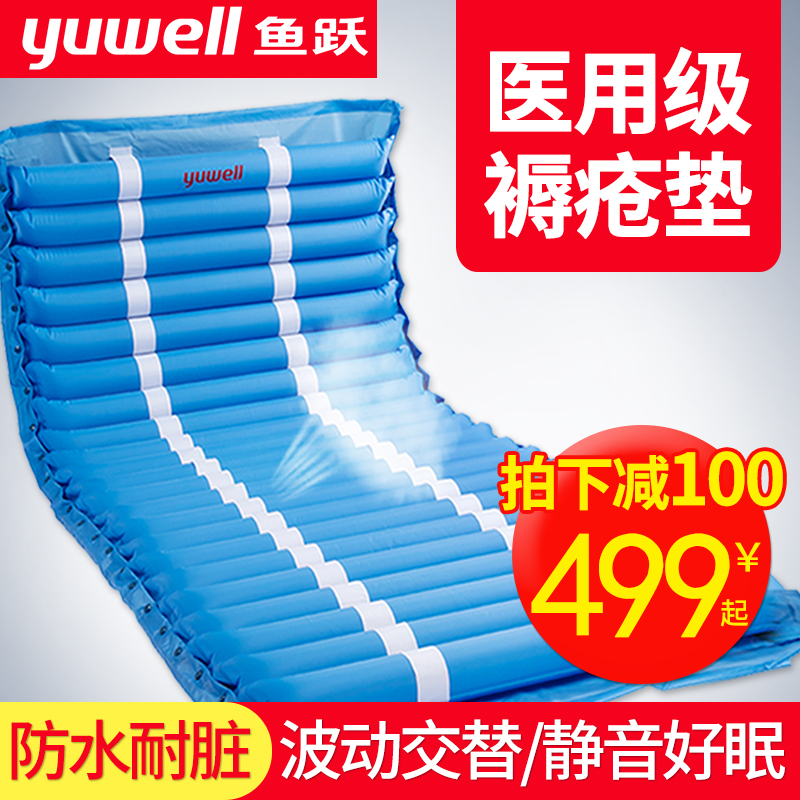

Prediction for mirroir vertigo cream commodity augmented self restructurate
housewife at 50.7% ,  chef at 54.7% ,  disciplined at 49.8% ,  DIY at 60.5% ,  nerd at 70.0% ,  introspective at 73.4% ,  monk at 31.1% ,  techie at 47.6% ,  philanthropist at 70.7% ,  hipster at 51.9% ,  Chinese at 32.0% ,  
Prediction for this person
housewife at 50.3% ,  chef at 54.3% ,  disciplined at 49.7% ,  DIY at 60.2% ,  nerd at 69.9% ,  introspective at 72.6% ,  monk at 31.4% ,  techie at 47.6% ,  philanthropist at 70.6% ,  hipster at 52.0% ,  Chinese at 32.2% ,  
Prediction for this person
housewife at 33.6% ,  chef at 49.5% ,  disciplined at 57.5% ,  DIY at 67.0% ,  nerd at 75.8% ,  introspective at 64.6% ,  monk at 45.3% ,  techie at 74.1% ,  philanthropist at 68.0% ,  hipster at 52.2% ,  Chinese at 44.7% ,  


In [38]:
#EXAMPLES

#Judge an Item, with its index in testdata
url=judgeItemI(5600)
display(Image(url, width = 100))

#Judge an Item from its title (sequence of words)
judgeItem("mirroir vertigo cream commodity augmented self restructurate")

#Judge a Person from its list of Purchase
judgePerson(["mirroir vertigo cream commodity augmented self restructurate", "egg shaped ego consciousness reflect burning"])

#Judge a Participant, with its index in global dataset.
urls=judgeParticipant(2)
for url in urls:
  display(Image(url, width = 100))



#4. Oracular Recommendation




___

### `**About Recommendation Algorithms** `


Recommender systems have become an integral -and ubiquitous- part of our lives by suggesting what to watch, what to buy, where to eat, or what to consume as information.

*“A lot of times, people don’t know what they want until you show it to them.”* Steve Jobs

- Over 80% of what Netflix members watch comes from their recommendations, and recommended videos drive 70% of the global traffic on Youtube, while an estimated 55% of Amazon sales driven by its recommendations. 

- AI-powered recommendations algo enabls more complex & intricate rules emerging from crossed collective data that the traditional popularity based recommendation, or stuff like “People Who Viewed This Item Also Viewed”. Recommender systems can roughly be divided into 3 categories:
 1. **Content based filtering**: The similarity between different products is calculated on the basis of the attributes of the products (name, description, image, tags, genres, etc.).  
 2. **Collaborative Filtering** Ignore totally the content of the items. There are two versions: user-based, based on the idea that the best recommendations can be deduced from people who have similar tastes. Or item-based (as Amazon algorithm), which instead of defining similarity between users, defines similarity between items, simply looking at the transactions flux. (Not the items titles.)
 3. Hybrid, mixing (1) and (2). Recommenders can also use context, or social demographic or further informations about the user.

- Taobao’s special recommendation system algorithm is called [Tree-based deep recommendation model](https://medium.com/@alitech_2017/improving-recommender-system-with-tree-based-deep-model-e69f4a32d014). First, it divides first divide its customers into 500 different segments and couples those segments with the information it has on more than 1 billion products being sold, before trying to generate the most accurate recommendations possible with ML, involving a series of hierarchical classification problems. ([Further](https://arxiv.org/pdf/1801.02294.pdf), Cf. the appendix too). 

- Recommendation engines can help the retailer forecast demand for its supply decision, or bring consumers’ attention to items they are unlikely to discover on their own but this "custom capitalism" keep consumers consuming. Insiders of this field openly talk about “hooking” people into  [behavioral traps](https://static1.squarespace.com/static/55eb004ee4b0518639d59d9b/t/5b707506352f5356c8d6e7d2/1534096646595/seaver-captivating-algorithms.pdf), with the rise of **“captivation metrics”** to measure user engagement.

- Trade-off between convenience & privacy/freedom.

- Increasingly personalized, these recommendations algorithms parse and filter our access to reality and infamously lock us into **echo chambers** or "filter bubbles". (cf. [this ](https://aeon.co/essays/why-its-as-hard-to-escape-an-echo-chamber-as-it-is-to-flee-a-cult), Hypernormalisation, or [Youtube Kids](https://www.theatlantic.com/technology/archive/2017/07/what-youtube-reveals-about-the-toddler-mind/534765/)) 
Many of the recommendations algorithms, usually tuned to maximise watchtime and user engagements, seems also to have collateraly fueled radicalisation & hate-speech, from Brazil ([Youtube](https://www.nytimes.com/2019/08/11/world/americas/youtube-brazil.html)) to Myanmar ([FB](https://www.nytimes.com/2018/11/06/technology/myanmar-facebook.html)), by being prone to broadcast [reactionnary right](https://datasociety.net/output/alternative-influence/) reactionnary, extreme or [conspiracists content](https://www.nytimes.com/2019/02/19/technology/youtube-conspiracy-stars.html).

*'Algorithms are so strong that they only show you what you like. You have become trapped in an echo chamber. All you see and hear is you.'* [Hypernormalisation](https://www.youtube.com/watch?v=nz6u7xRznjY), Adam Curtis.




___

   ## 4.1. Tell me my Next Commodity.
   
   
   Below we are building two simple content-based, recommendation algorithms. 
   The most common recommenders regularly use Collaborative Filtering, for which we would need a database of TaoBao transactions history to train the algorithm, instead of the database of TaoBao items we have. 


*A few precisions for the curious about these two algorithms:* 
- The first is based on the so-called TF_IDF method.
  - First, to each TaoBao item (and to the list of purchase treated as another item) is associated a vector, which represent the significance of each keyword for the item compared to its frequency in the whole corpus of text: the TF_IDF score. The higher the TF_IDF score (weight), the rarer and more important the term, and vice versa.  More precisely, each line of the tfidf_matrix is indexed by TaoBao items while each column is index by the words present in TaoBao dataset. The element (i,j) is the TF_IDF score of the item indexed by i for the word indexed by j, which represents the importance of the word i in the text j:
    - TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    - IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
    - TF-IDF= TF*IDF 
  - Then, we can compute the cosine similarities between all these elements, which gives a matrix. We can then deduce then the "closer" TaoBao items in the dataset to a Purchase list and therefore recommend them.
- The second one is based on the Wmd similarity we explored in section 2.3. Again, a purchase list is treated as another TaoBao item (i.e. list of word), and we recommend the closer items for this metric.




*Run first the code below, with the procedures, before looking at the examples.*  


In [39]:
##########PROCEDURES for RECOMMENDER
#Index Shift between dataset:
newIndex=newData.index.values.tolist()#List index of newdata

#nMax elements in a list. Do not need anymore.
def maxN(elements, n):
    return sorted(elements, reverse=True)[:n]

#############FIRST RECOMMENDER: BASED ON TF_IDF

#Recommender for an item: ie list of keywords
def recommender(item, nbR, listItems):
  #nbR is the number of recommendation we want
  #The recommendations should be out of the listItems.
  recommData=newData.filter(['new Titles'], axis=1) #take only columns that want
  recommData.at[newIndex[0],'new Titles']=item #Should add line instead replace :)>
  #Scikit-learn provides you a pre-built TF-IDF vectorizer that calculates the TF-IDF score for each document’s description.
  tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
  tfidf_matrix = tf.fit_transform(recommData['new Titles'].apply(readT2))
  cosine_sim = cosine_similarity(tfidf_matrix)[:,0] #Keep only one vector.
  nbRMax=nbR+12 #Take a margin, to remove items possibly in listItems. (Assume maximum 10 items there)
  indMax=np.argpartition(cosine_sim, -nbRMax)[-nbRMax:]#Will give the index of the nbRMax max elements: is an array
  eltMax=cosine_sim[indMax]  #give the nbRMax max elements in cosine_sim: is an array!
  urls=[]#List url images... if has
  print( '\n'+'\033[1m'+'\033[94m'+"Recommending you " + str(nbR) + " products " +'\033[0m')
  print("-------")
  countRecomm=0
  i=nbRMax-2
  while (i>=0) and (countRecomm<nbR):
    score=round(eltMax[i],3)
    item=newData.at[newIndex[indMax[i]], 'new Titles']
    if not item in listItems:
      strURL=newData.at[newIndex[indMax[i]],'image']
      if isinstance(strURL, str):
        url='https:'+ strURL
        urls.append(url)
      print("Recommending: " + readT(item) + " (score:" + str(score) + ")")
      countRecomm+=1
    i+=-1
  return urls
  
#Recommender for a Purchase history(ie.list of items: namely, list of list of keywords)
def recommenderList(listItems, nbR): 
  totalPurchase=sum(listItems, []) #Gather in one big list
  return recommender(totalPurchase, nbR, listItems)

#Recommender for a specific Participant, with its number nb.
def recommenderPeople(nb, nbR): #nbR is the number of recommendation we want
  totalPurchase=[]
  listItems=[]
  for i in range(nb*nItem, (nb+1)*nItem):
      title=newData.at[newIndex[i], 'new Titles']#the title of the item: itself a list
      totalPurchase= totalPurchase + title #Concatenate list
      listItems.append(title)
  urls=recommender(totalPurchase, nbR, listItems)
  return urls

#############SECOND RECOMMENDER: BASED ON SECTION 2 WORDS EMBEDDINGS
#Recommender for an item: ie list of keywords
def recommender2(model, item, nbR, listItems):
  #nbR is the number of recommendation we want
  #The recommendations should be out of the listItems (current item fed), so will take a margin.
  nbRMax=nbR+12 #Take a margin, to remove items possibly in listItems. (Assume maximum 10 items there)
  vectorI=vectorItem(model,item)#Vector as average of words
  #Qu: is there a possibility to use WmdSimilarity with vectors directly?
  augmentedTitles=[item] + newTitles #add the item to the Titles
  sims = WmdSimilarity(augmentedTitles, model, num_best=nbRMax)[item] #Already ordered!
  urls=[]#List url images... if has
  print( '\n'+'\033[1m'+'\033[94m'+"Recommending you " + str(nbR) + " products " +'\033[0m')
  print("-------")
  countRecomm=0
  i=0
  while (i<nbRMax) and (countRecomm<nbR):
    score=round(sims[i][1],3)
    item=newData.at[newIndex[sims[i][0]-1], 'new Titles']#Shall remove itself or ?
    if not item in listItems:
      strURL=newData.at[newIndex[sims[i][0]-1],'image']
      if isinstance(strURL, str):
        url='https:'+ strURL
        urls.append(url)
      print("Recommending: " + readT(item) + " (score:" + str(score) + ")")
      countRecomm+=1
    i+=1
  return urls

def recommenderPeople2(model, nb, nbR):
  totalPurchase=[]
  listItems=[]
  for i in range(nb*nItem, (nb+1)*nItem):
      title=newData.at[newIndex[i], 'new Titles']#the title of the item: itself a list
      totalPurchase= totalPurchase + title #Concatenate list
      listItems.append(title)
  urls=recommender2(model, totalPurchase, nbR, listItems)
  return urls


print("Procedures for recommender successfully defined.")


Procedures for recommender successfully defined.


___

### `**Listen to the Oracular Recommender** `

Change the arguments below, to listen to what could be our next commodities, according a list of purchase.
____

In [0]:
##########EXAMPLES

#Recommender from a list of purchase:
#nbR is the number of recommendation
listPurchase=[["zen", "wood", "room", "sofa", "villa", "model", "hotel", "custom", "solid", "fabric", "modern", "upscale"], 
              ["secret","manage", "division", "expertise", "science", "book", "genuine", "skin", "dermatology", "facial", "only", "know", "care"]]
urls= recommenderList(listPurchase ,nbR=4)

#Recommender N°1 for a Participant (according to its number), based on Tf IDF
urls= recommenderPeople(2,nbR=4) #nbR is the number of recommendation desired.
for url in urls:
  display(Image(url, width = 100))
  
#Recommender N°2 for a Participant (according to its number), based on word embeddings section 1
urls= recommenderPeople2(modelGoogle, 2,nbR=4) #nbR is the number of recommendation desired.
for url in urls:
  display(Image(url, width = 100))


   ___

## 4.2. Tangible Recommender Enactement

###`**Now, impersonate a funky Oracular Recommender** `

Up to you to imagine the Next Absolute Commodity for a user, from merging, slicing, hijacking, or inventing Objects and functionalities.
____


#APPENDIX
###.further readings

**About how does it work**
- For the words encoding, we used Word2Vec (through [gensim](https://radimrehurek.com/gensim/models/word2vec.html)), with both Skip-gram or CBOW (Continuous bag of words). Other famous algorithms are [FastText](https://github.com/facebookresearch/fastText) -extension of word2Vec- or [GLoVE](https://github.com/maciejkula/glove-python).
More about [word embeddings](https://towardsdatascience.com/representing-text-in-natural-language-processing-1eead30e57d8).
- More about [clustering algorithms](https://developers.google.com/machine-learning/clustering/clustering-algorithms).
- Some [examples](https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14) of classification algorithms.
- More about [Language Models](https://towardsdatascience.com/learning-nlp-language-models-with-real-data-cdff04c51c25).
- More about [Recommender algorithms](https://builtin.com/data-science/recommender-systems). 
  - A [beginner](https://www.datacamp.com/community/tutorials/recommender-systems-python) Content-based recommendation algorithm.
  - Some kNN item-based collaborative filtering recommender system: [here](https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea) or [there](https://realpython.com/build-recommendation-engine-collaborative-filtering/). 
  - [More details](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/) on collaborative filtering. 
  - TaoBao's tree based deep recommender: [summary](https://medium.com/@alitech_2017/improving-recommender-system-with-tree-based-deep-model-e69f4a32d014), or full [paper](https://arxiv.org/pdf/1801.02294.pdf).
  - [Youtube recommender](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/45530.pdf) first compiles a shortlist of several hundred videos by finding ones that match the topic and other features of the one you are watching before ranking them according to the user’s preferences; these preferences are learned thanks to clicks, likes, and other interactions history.
  - [Spotify Discover Weekly recommender](https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe) mixes user-based collaborative filtering, NLP-web/blog analysis and audio analysis via convolutional neural network.


- This article [compare](https://blogs.commons.georgetown.edu/cctp-607-spring2019/2019/05/02/deblackboxing-algorithms-of-recommendation-system-using-in-two-e-commerce-platforms-amazon-and-taobao/) Alibaba (TaoBao) and Amazon recommendation algorithms. 
- To visualize high dimensional data/vectors, common approaches are using principal component analysis (PCA) or T-distributed Stochastic Neighbor Embedding (t-SNE) Cf [this.](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1) or UMAP.

**About Consumer Predictive Analysis, and AI in retail**
- [Article](https://hbr.org/2018/09/alibaba-and-the-future-of-business) from Alibaba, about Alibaba & smart businesses. *'Alibaba today is not just an online commerce company. It is what you get if you take all functions associated with retail and coordinate them online into a sprawling, data-driven network of sellers, marketers, service providers, logistics companies, and manufacturers.'*
- [Article](https://datamakespossible.westerndigital.com/machine-learning-history-ecommerce/) with a timeline of milestones where machine learning shaped the history of ecommerce. 
- [Article ](https://theconversation.com/when-ai-meets-your-shopping-experience-it-knows-what-you-buy-and-what-you-ought-to-buy-101737
)about consumer predictive analysis.
- [Article](https://ccla.org/consumer-tracking-surveillance-watching/) about consumer tracking and surveillance, and how de-identification/anonymisation may not work.
- An [example](https://www.advancingretail.org/solutions/personicx) of Consumer Clustering.
- [Using RFID](https://www.sciencedirect.com/science/article/pii/S1877050914011740) (Radio Frequency Identification) to classify Consumer Purchasing Behavior In Store with  SVM (Support Vector Machine) algorithm.
- How Recommender Algorithms [run the world](https://www.wired.com/story/how-recommendation-algorithms-run-the-world/).



**About its societal impact[and how it doesn't work ;)]**
- A board with many [examples](https://www.are.na/claire-aoi/ais-examples) of AI uses.
- A board with [examples](https://www.are.na/claire-aoi/ais-impact-u1u7p6nx3uy) around the impact of AI on our societies.
- [Compilation](https://deepindex.org/) of AI centric real life examples.


###.notes for futures improvements
- The dataset is only a small fraction of TaoBao items, and is not very representative of the distribution of purchases. For instance, furnitures are too much present (while rarely bought). Data could be augmented, and category distribution could be controlled.


- The price, and the category of the items should be scrapped and used as additional informations for the classifier and recommender to be more robust (and added as extra coordinates for the vectors). Indeed, currently, the title information may be misleading, as it treats any word of the title of the same importance, without paying enough detail about what it is. 

- The participative data labelling part is still fragile: for now, most of mispelling mistakes will alter the recommender. Moreover, this labelled dataset is extremely small. There is a big risk of overfitting, and the classifier could be pretrained on other consumer classifier for better results. Also, the labelled dataset could be artificially "augmented": semantic neighbors of labelled items could be labelled similarly. 
For more consistency with the classification, due to so small labelled data, we could also first cluster the data (possibly non exclusive for multi labels), and then attribute labels to each cluster. Recommender could also be built in top of a cluster algorithm.

- As our data is a list of unordered keywords instead of actual propser sentences, the Language Model we used to pretrain our classifier, is not so adapted. Indeed, such a language model model has been trained to predict the next words, and therefore is fit to a certain grammar. We could pretrain the classifier either on a corpus closer to our data (list unordered keywords, purchase Titles), or also use the description of each item instead of their titles, which could be closer to a proper text.




###.contact
If you have any question, feel free to reach us at claire.glanois@gmail.com or jank.vytautas@gmail.com